# Global Climate Change Analysis

*The dataset for this project originates from the [Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)*
<br>

### Background:

Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science. We are turning some of the data over to you so you can form your own view.


### Problem Statement: 

In this problem we have to perform in-depth analysis to study the change of climate across all many years. Also we have to build a model capable enough to forecast temperature of india.

### Dataset Information

The dataset originates from the [Berkeley Earth Surface Temperature Study](http://berkeleyearth.org/data/). It combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away.

In this dataset, we have several files:

1. **Global Land and Ocean-and-Land Temperatures** - GlobalTemperatures.csv

2. **Global Average Land Temperature by Country** - GlobalLandTemperaturesByCountry.csv

3. **Global Average Land Temperature by State** - GlobalLandTemperaturesByState.csv

4. **Global Land Temperatures By Major City** - GlobalLandTemperaturesByMajorCity.csv

5. **Global Land Temperatures By City** - GlobalLandTemperaturesByCity.csv 

<a id ='toc'></a>
# Table of Contents

1. **[Environment Setup](#environment_setup)**
    - 1.1 - **[Install Package](#install_packages)**
    - 1.2 - **[Load Dependencies](#import_packages)**
2. **[Load datasets](#load_data)**
3. **[Data Cleaning](#data_cleaning)**
    - 3.1 - [Missing Data Treatment](#missing)
    - 3.2 - [Handle Noise](#noise)
4. **[Feature Engineering](#feature_engineering)**
5. **[Climate Change Analysis](#change)**
    - 5.1 - [Global Land and Ocean Temperature Change](#global)
    - 5.2 - [Global Land Temperature by Country](#country)
    - 5.3 - [Global Land Temperatures By Major City](#city)
6. **[Climate Change in India](#india)**
7. **[Time Series Modeling](#tsm)**
    - 7.1 - [Visualize the Time Series](#visualize)
    - 7.2 - [Stationarize the Series](#stationarize)
    - 7.3 - [Find Optimal Parameters](#optimal)
    - 7.4 - [Build ARIMA Model](#arima)
    - 7.5 - [Make Predictions](#predict)
8. **[Conclusion](#conclusion)**

<a id ='environment_setup'></a>
## 1. Environment Setup

[goto toc](#toc)

<a id ='install_packages'></a>
### 1.1. Install Packages

Install required packages

[goto toc](#toc)

In [1]:
# Install pandas
! pip install pandas

# Install matplotlib
! pip install matplotlib

# Install seaborn
! pip install seaborn 

# Install sklearn
! pip install sklearn

# Install tqdm to visualize iterations
! pip install tqdm

<a id ='import_packages'></a>
### 1.2. Load Dependencies

Import required packages

[goto toc](#toc)

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
from tqdm import tqdm
import itertools

# Libraires for visualization
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

import seaborn as sns

# Set default setting of seaborn
sns.set()

# Import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

py.init_notebook_mode(connected=True)

# Packages for timeseries modeling
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams

# Import performance metric
from sklearn.metrics import mean_squared_error

# Import warning to ignore them
import warnings
warnings.filterwarnings('ignore')

<a id ='load_data'></a>
## 2. Load datasets

We will loading all the datasets required using *pd.read_csv()* function.

[goto toc](#toc)

#### Read Global Land and Ocean-and-Land Temperatures from GlobalTemperatures.csv file

In [3]:
# read the data
global_data = pd.read_csv("data/GlobalTemperatures.csv")


# print the first five rows of the data
global_data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Global Land and Ocean-and-Land Temperatures Data Set has \033[4m\033[1m{}\033[0m\033[0m data points with \033[4m\033[1m{}\033[0m\033[0m variables each.".format(*global_data.shape))

Global Land and Ocean-and-Land Temperatures Data Set has 3192 data points with 9 variables each.


#### Read Global Average Land Temperature by Country from GlobalLandTemperaturesByCountry.csv file

In [5]:
# read the data
country_data = pd.read_csv("data/GlobalLandTemperaturesByCountry.csv")


# print the first five rows of the data
country_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [6]:
print("Global Average Land Temperature by Country Data Set has \033[4m\033[1m{}\033[0m\033[0m data points with \033[4m\033[1m{}\033[0m\033[0m variables each.".format(*country_data.shape))

Global Average Land Temperature by Country Data Set has 577462 data points with 4 variables each.


#### Read Global Land Temperatures By Major City from GlobalLandTemperaturesByMajorCity.csv file

In [7]:
# read the data
city_data = pd.read_csv("data/GlobalLandTemperaturesByMajorCity.csv")


# print the first five rows of the data
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [8]:
print("Global Land Temperatures By Major City Data Set has \033[4m\033[1m{}\033[0m\033[0m data points with \033[4m\033[1m{}\033[0m\033[0m variables each.".format(*country_data.shape))

Global Land Temperatures By Major City Data Set has 577462 data points with 4 variables each.


**Note:**

There are many missing values as well as noise in the datasets read so we need to clean them.

<a id='data_cleaning'></a>
## 3. Data Cleaning

*Data cleaning* refers to preparing data for analysis by removing or modifying data that is incomplete, irrelevant, duplicated, or improperly formatted.

[...goto toc](#toc)

<a id='missing'></a>
### 3.1. Missing Data Treatment

Since we are dealing with time series data, we will drop the columns with maximum missing data and only drop rows of features representing temperature of land

[...goto toc](#toc)

In [9]:
# Function to get missing values
def get_missing(data):
    
    # Create the dataframe
    missing_values = pd.DataFrame()

    # Get list of all columns
    missing_values['Features'] = data.columns.values

    # get the count of missing values
    missing_values['Count'] = data.isnull().sum().values

    # Calculate percentage of missing values
    percentage = data.isna().mean()*100
    missing_values['Percentange'] = percentage.values

    # return the dataframe
    return missing_values

In [10]:
# Function to plot missing values
def plot_missing(missing_values):
    # Plot missing values

    # Get list of features
    columns = missing_values.Features.values.tolist()

    # Get index's
    ind = missing_values.index.to_list() 

    # Create subplots
    fig, ax = plt.subplots(2,1,figsize=(18, 28))

    # Plot missing values based on count
    rects = ax[0].barh(ind, missing_values.Count.values.tolist(), color='lightblue')
    ax[0].set_yticks(ind)
    ax[0].set_yticklabels(columns, rotation='horizontal')
    ax[0].set_xlabel("Count of missing values")
    ax[0].set_title("Variables with missing values")

    # Plot missing values based on percentage
    rects = ax[1].barh(ind, missing_values.Percentange.values.tolist(), color='pink')
    ax[1].set_yticks(ind)
    ax[1].set_yticklabels(columns, rotation='horizontal')
    ax[1].set_xlabel("Percentage of missing values")
    ax[1].set_title("Variables with missing values")

#### Handling missing data in Global Land and Ocean-and-Land Temperatures dataset

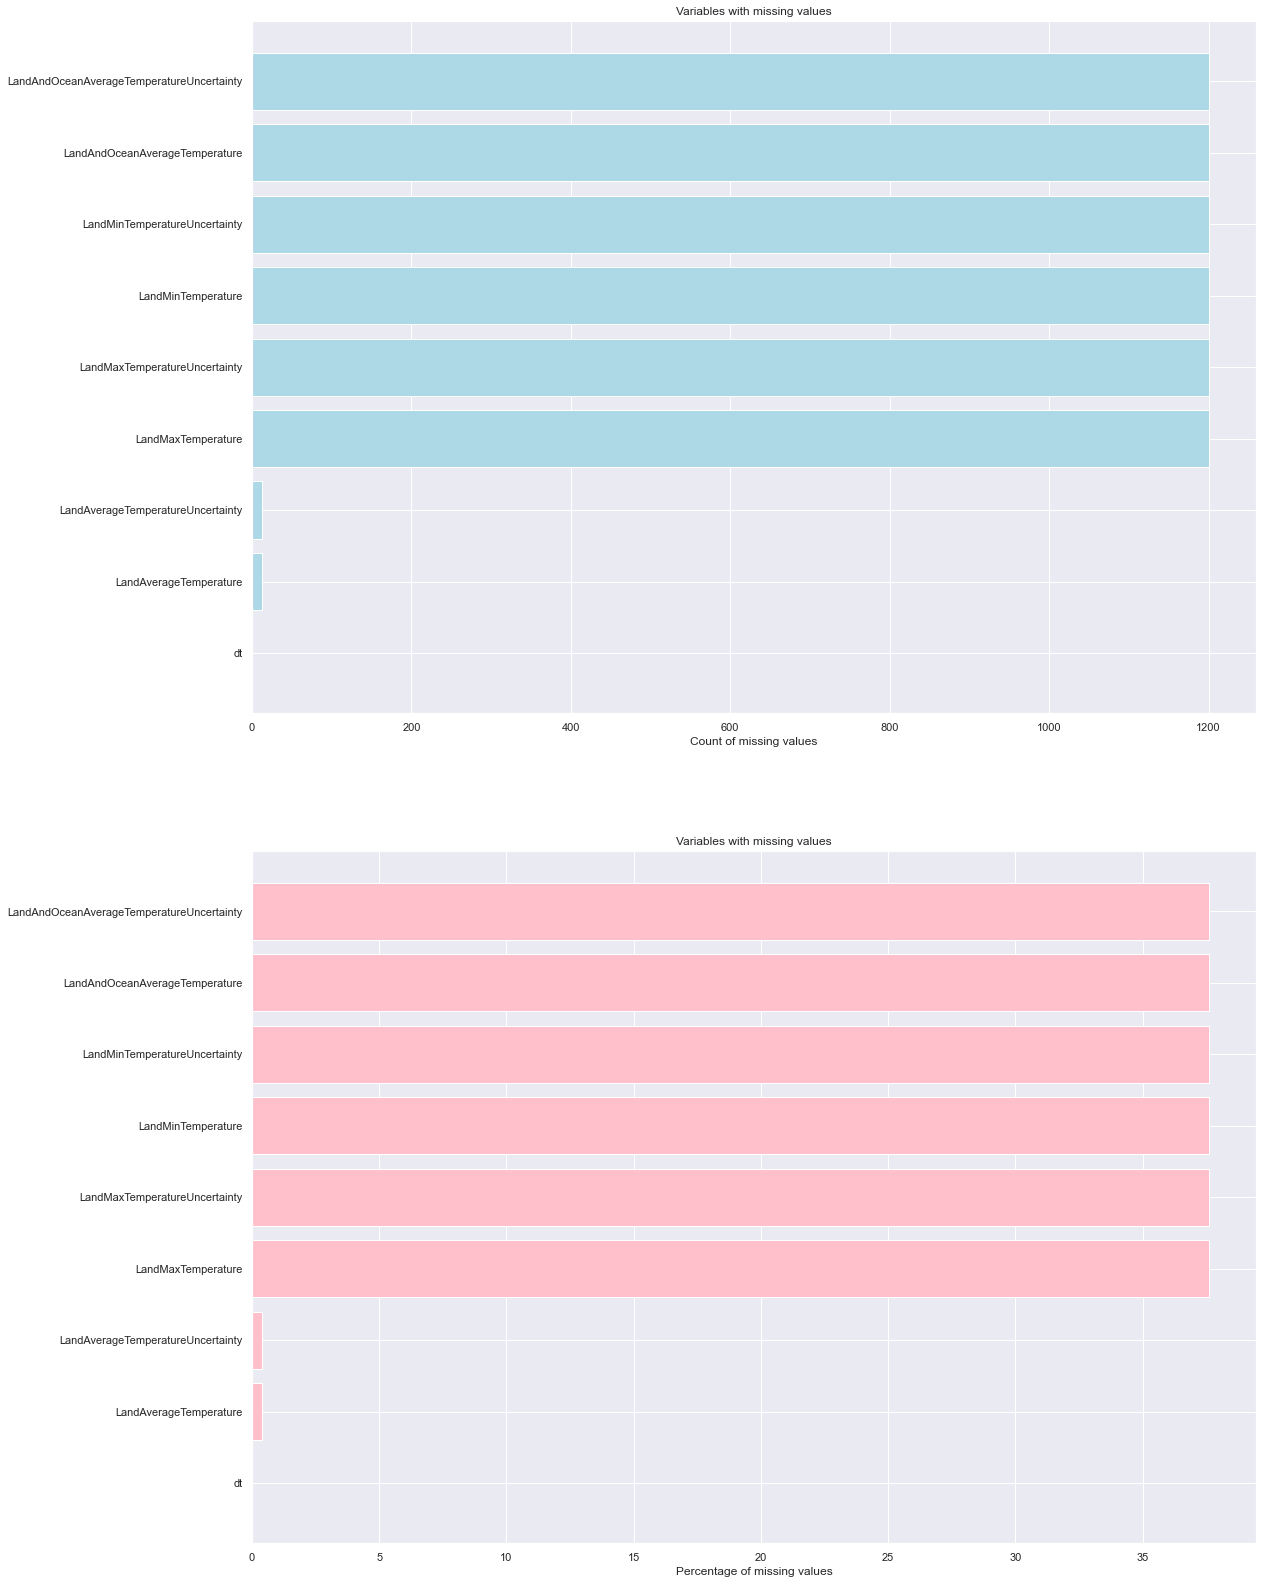

In [11]:
plot_missing(get_missing(global_data))

In [12]:
global_data_no_missing = global_data[['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty']].dropna(axis = 0)
global_data_no_missing.shape

(3180, 3)

#### Missing data in Global Average Land Temperature by Country dataset

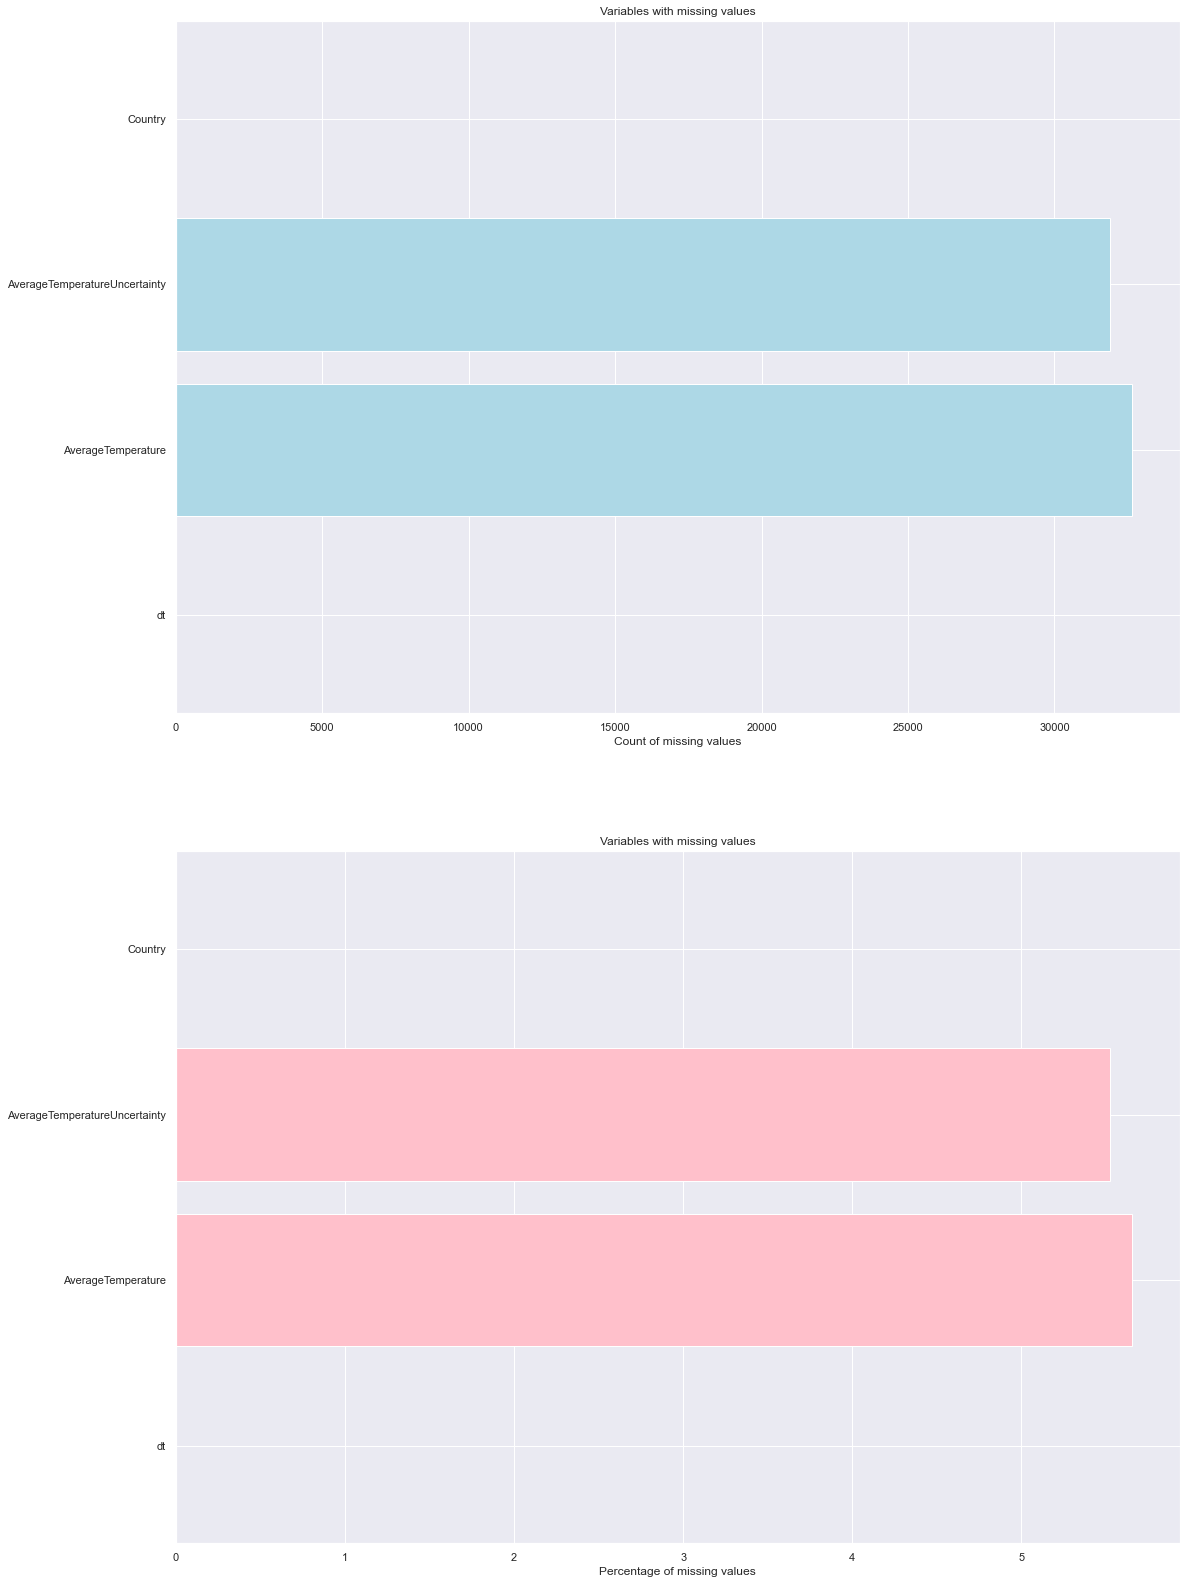

In [13]:
plot_missing(get_missing(country_data))

In [14]:
country_data_no_missing = country_data[['dt', "Country", 'AverageTemperature', 'AverageTemperatureUncertainty']].dropna(axis = 0)
country_data_no_missing.shape

(544811, 4)

#### Missing data in Global Land Temperatures By Major City dataset

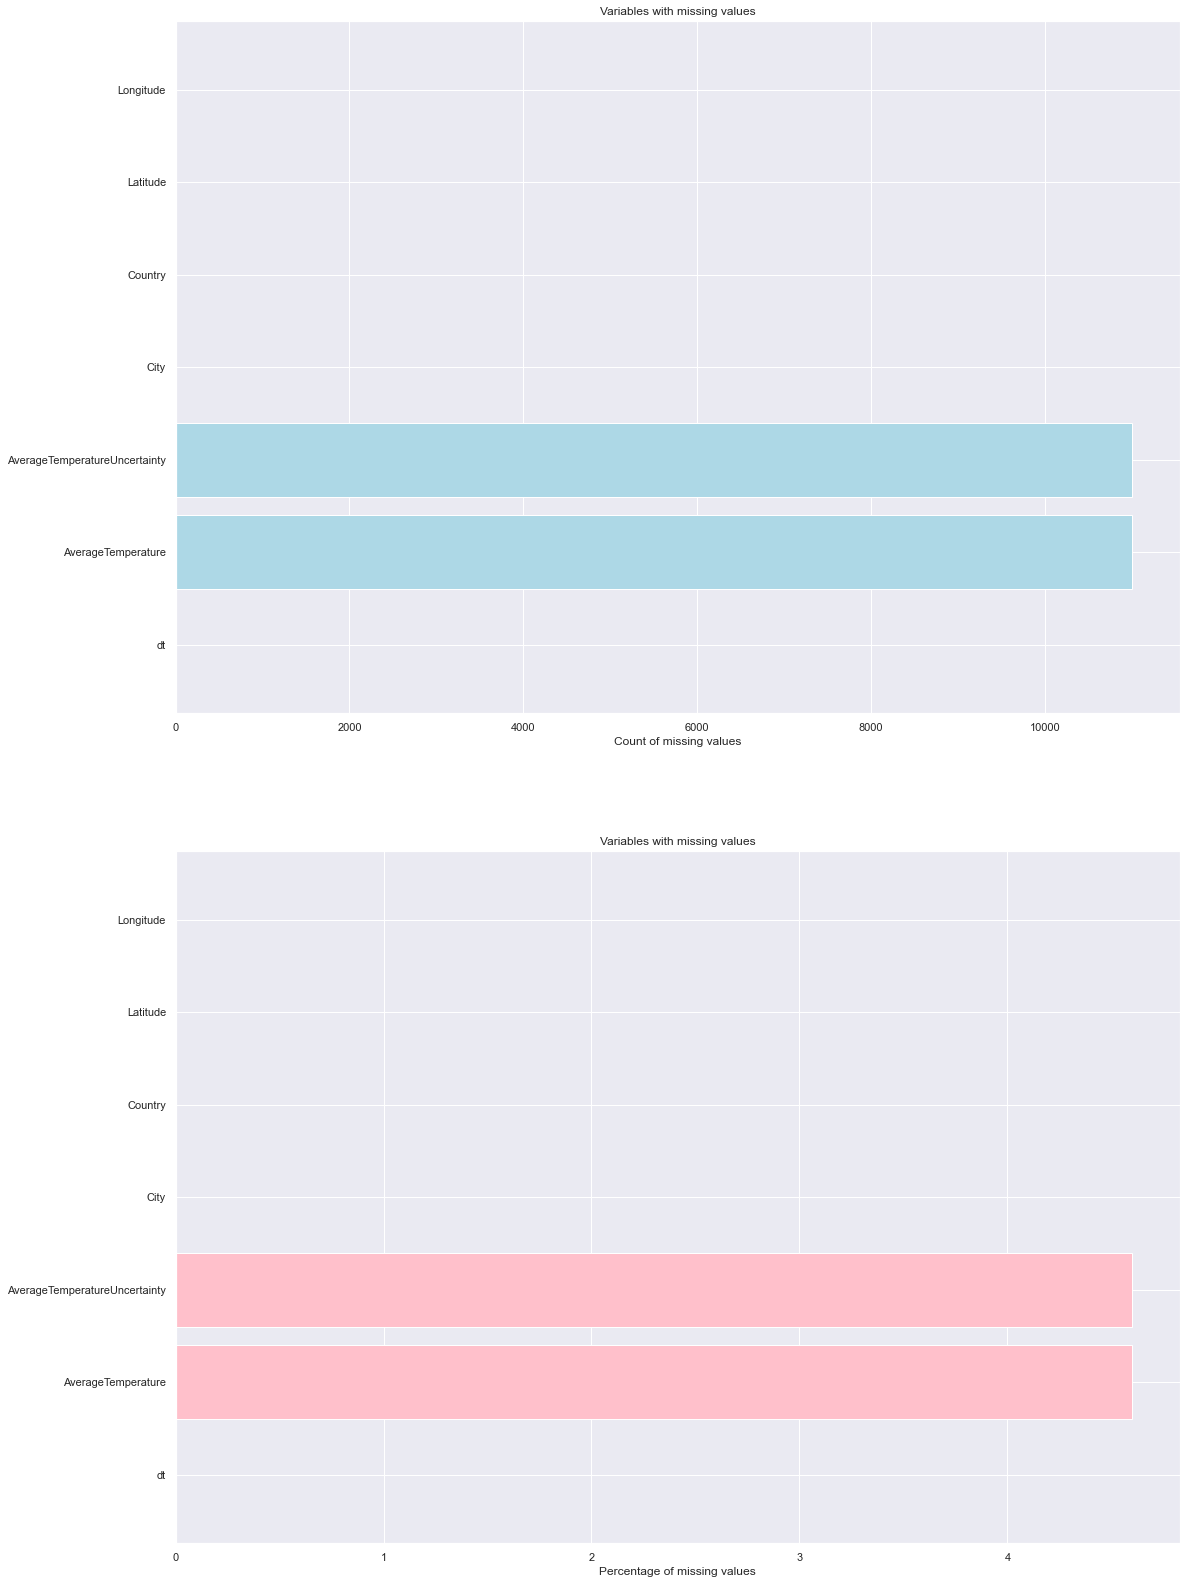

In [15]:
plot_missing(get_missing(city_data))

In [16]:
city_data_no_missing = city_data[['dt', "Country", "City", 'AverageTemperature', 'AverageTemperatureUncertainty']].dropna(axis = 0)
city_data_no_missing.shape

(228175, 5)

<a id='noise'></a>
### 3.2. Handling Noise

In all the dataset the **dt** which is a date feature is represented as type object so we need to convert them in DateTime. To achive this we will be using **pd.to_datetime()** function of pandas.
[...goto toc](#toc)

In [17]:
def convert_to_datetime(data):
    
    # Convert to datetime object
    data['dt'] = pd.to_datetime(data.dt)
    
    # return the dataframe
    return data

In [18]:
# Handling noise in Global Land and Ocean-and-Land Temperatures dataset
global_data_cleaned = convert_to_datetime(global_data_no_missing)
global_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3191
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   dt                                 3180 non-null   datetime64[ns]
 1   LandAverageTemperature             3180 non-null   float64       
 2   LandAverageTemperatureUncertainty  3180 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 99.4 KB


In [19]:
# Handling noise in Global Average Land Temperature by Country dataset
country_data_cleaned = convert_to_datetime(country_data_no_missing)
country_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             544811 non-null  datetime64[ns]
 1   Country                        544811 non-null  object        
 2   AverageTemperature             544811 non-null  float64       
 3   AverageTemperatureUncertainty  544811 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 20.8+ MB


In [20]:
# Handling noise in Global Land Temperatures By Major City dataset
city_data_cleaned = convert_to_datetime(city_data_no_missing)
city_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228175 entries, 0 to 239175
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             228175 non-null  datetime64[ns]
 1   Country                        228175 non-null  object        
 2   City                           228175 non-null  object        
 3   AverageTemperature             228175 non-null  float64       
 4   AverageTemperatureUncertainty  228175 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 10.4+ MB


<a id='feature_engineering'></a>
### 4. Feature Engineering

In our datasets we will be creating new features like year and month from existing feature dt. This process of creating new features from existing feature is called Feature Engineeiring.


[...goto toc](#toc)

In [21]:
# function to create new features
def feature_eng(data):
    
    # Get month from date feature
    data['month'] = data['dt'].dt.month
    
    # Get year from date feature
    data['year'] = data['dt'].dt.year
    
    # return datframe
    return data

In [22]:
# Feature engineering on Global Land and Ocean-and-Land Temperatures dataset
global_data_new = feature_eng(global_data_cleaned)
global_data_new.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,month,year
0,1750-01-01,3.034,3.574,1,1750
1,1750-02-01,3.083,3.702,2,1750
2,1750-03-01,5.626,3.076,3,1750
3,1750-04-01,8.490,2.451,4,1750
4,1750-05-01,11.573,2.072,5,1750


In [23]:
# Feature engineering on Global Average Land Temperature by Country dataset
country_data_new = feature_eng(country_data_cleaned)
country_data_new.head()

,dt,Country,AverageTemperature,AverageTemperatureUncertainty,month,year
0,1743-11-01,Åland,4.384,2.294,11,1743
5,1744-04-01,Åland,1.530,4.680,4,1744
6,1744-05-01,Åland,6.702,1.789,5,1744
7,1744-06-01,Åland,11.609,1.577,6,1744
8,1744-07-01,Åland,15.342,1.410,7,1744


In [24]:
# Feature engineering on Global Land Temperatures By Major City dataset
city_data_new = feature_eng(city_data_cleaned)
city_data_new.head()

,dt,Country,City,AverageTemperature,AverageTemperatureUncertainty,month,year
0,1849-01-01,Côte D'Ivoire,Abidjan,26.704,1.435,1,1849
1,1849-02-01,Côte D'Ivoire,Abidjan,27.434,1.362,2,1849
2,1849-03-01,Côte D'Ivoire,Abidjan,28.101,1.612,3,1849
3,1849-04-01,Côte D'Ivoire,Abidjan,26.140,1.387,4,1849
4,1849-05-01,Côte D'Ivoire,Abidjan,25.427,1.200,5,1849


<a id='change'></a>
## 5. Climate Change Analysis
[...goto toc](#toc)

We will be analyzing climate change as:
- Global Land and Ocean Temperature Change
- Global Land Temperature by Country
- Global Land Temperatures By Major City

<a id='global'></a>
### 5.1. Global Land and Ocean Temperature Change

[...goto toc](#toc)


#### Land Average Temperature from 1750 to 2010

To analyze temperature change over year we will be grouping the dataset with respect to year

In [25]:
land_average = global_data_new.groupby('year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']].mean().reset_index()
land_average

,year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [26]:
# Get average temperature
mean_temp_world = land_average.LandAverageTemperature

# Get average temperature uncertainty
mean_temp_world_uncertainty = land_average.LandAverageTemperatureUncertainty

# Get list of year
years = land_average.year

# Plot the graph

# create trace to hold upperbound by adding uncertanity to average temperature
trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 200, 255)',
    )
)

# create trace to hold lowerbound by subtracting uncertanity from average temperature
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 200, 255)',
    )
)

# create trace to hold average temperature
trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(255, 10, 100)',
    )
)

# load all traces 
data = [trace0, trace1, trace2]

# Design a layout
layout = go.Layout( xaxis=dict(title='year'), yaxis=dict(title='Average Temperature, °C'), 
                   title='Average land temperature in world', showlegend = False)

# Create a figure in plotly
fig = go.Figure(data=data, layout=layout)

# Add additional trace to represent start of global warming
fig.add_trace(go.Scatter( x = [1975, 1975], y=[8, 9.2], mode="lines",line=go.scatter.Line(color="black"), showlegend=False))

# Plot the figure
py.iplot(fig)

From the charts you can see :

- There is global warming nowadays.
- The average temperature of Earth surface has the highest value in the last three centuries.
- The fastest temperature growth occurred in the last 30 years!
- This charts also have confidence intervals, which shows that measurement of temperature has become more accurate in the last few years.
- No doubt the Industrial Revolution had an effect between 1900 and 1975, but combining with the population increase that started to surge somewhere in 1975 (from ~2.5 bil in 1950 to 5 bil in 2000) created a much bigger negative contribution to the overall global warming state.

#### Average temperature in each season

To analyse temperature change in each season we will create a new feature called season using month feature.

In [27]:
# Function to calculate season
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

In [28]:
# Get seasons
global_data_new['season'] = global_data_new['month'].apply(get_season)
global_data_new.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,month,year,season
0,1750-01-01,3.034,3.574,1,1750,winter
1,1750-02-01,3.083,3.702,2,1750,winter
2,1750-03-01,5.626,3.076,3,1750,spring
3,1750-04-01,8.490,2.451,4,1750,spring
4,1750-05-01,11.573,2.072,5,1750,spring


<AxesSubplot:xlabel='year', ylabel='LandAverageTemperature'>

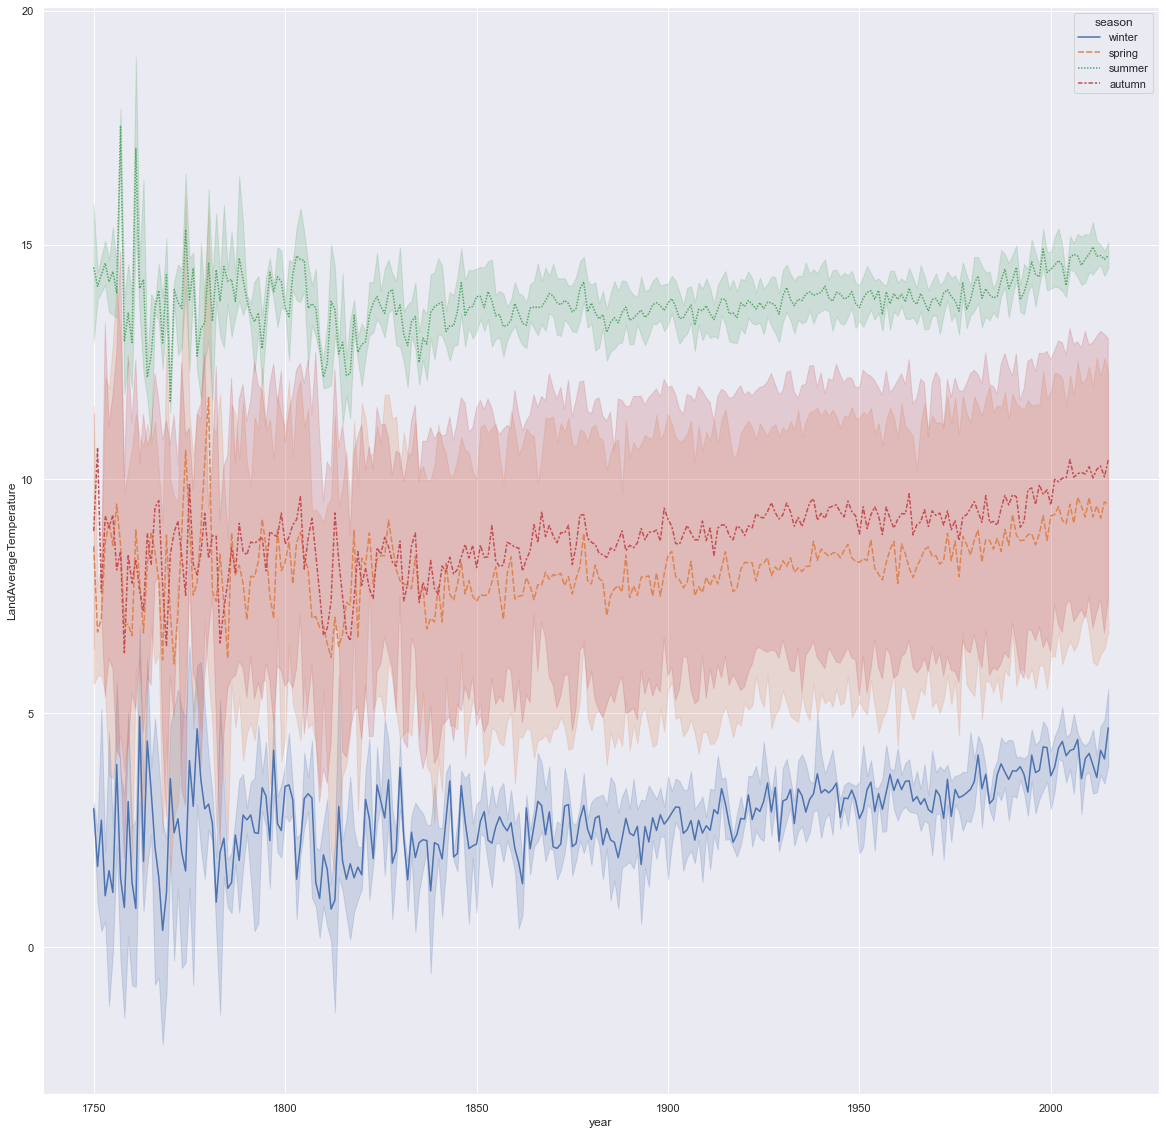

In [29]:
# Plot temperature change in each season
fig, axes = plt.subplots(1, figsize=(20, 20))
sns.lineplot(data = global_data_new, x="year", y="LandAverageTemperature", hue="season", style = "season", ax = axes)

**Note:** - We can clearly see that there is increase in temperature over the period of time. Even winters are getting hotter.

<a id='country'></a>
### 5.2. Global Land Temperature by Country

[...goto toc](#toc)


In [30]:
# Before we do further analysis we will group the dataset with respect to country
country_data_group = country_data_new.groupby('Country')[['AverageTemperature', 'AverageTemperatureUncertainty']].mean().reset_index()
country_data_group.head()

,Country,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,14.045007,0.930162
1,Africa,24.074203,0.395564
2,Albania,12.610646,1.524574
3,Algeria,22.985112,1.176241
4,American Samoa,26.611965,0.541258


In [31]:
print(country_data_group.Country.values.tolist())

['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Congo (Democratic Republic Of The)', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', "Côte D'Ivoire", 'Denmark', 'Denmark (Europe)', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Europe', 'Falkland Islands (Islas Malvinas)', '

**Note:**

1. Since some Continents included as countries we will discard them
2. There are some countries which are represented as colonies as well as countries like Denmark. It is present as Denmark as well as Denmark (Europe)

In [32]:
# Drop continents
country_data_group = country_data_group[~ country_data_group.Country.isin(['Antarctica', 'Europe', 'Africa', 
                                                      'South America'])]

In [33]:
# Removing colonies
country_data_group = country_data_group[~ country_data_group['Country'].isin(['Denmark', 'France', 'Netherlands', 'United Kingdom'])]

# Rename countries
country_data_group = country_data_group.replace( ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 
                                                  'United Kingdom (Europe)'], ['Denmark', 'France', 'Netherlands', 
                                                                              'United Kingdom'])

#### Mapping of average temperatures in the countries

In [34]:
# Get list of countries
countries_list = country_data_group.Country.values.tolist()

# Get average temperature of each country
avg_temp_countries = country_data_group.AverageTemperature.values.tolist()

# Create a data object
data = [ dict(
        type = 'choropleth',
        locations = countries_list,
        z = avg_temp_countries,
        locationmode = 'country names',
        text = countries_list,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

# Create layout
layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

# Create a figure in plotly
fig = dict(data=data, layout=layout)

# Plot the figure
py.iplot(fig, validate=False, filename='worldmap')

#### Sort the countries by the average temperature and plot them

In [35]:
country_data_group[country_data_group.Country == "Djibouti"]

,Country,AverageTemperature,AverageTemperatureUncertainty
59,Djibouti,28.816603,0.885405


[Text(0.5, 0, 'Average temperature'),
 Text(0.5, 1.0, 'Average land temperature in countries')]

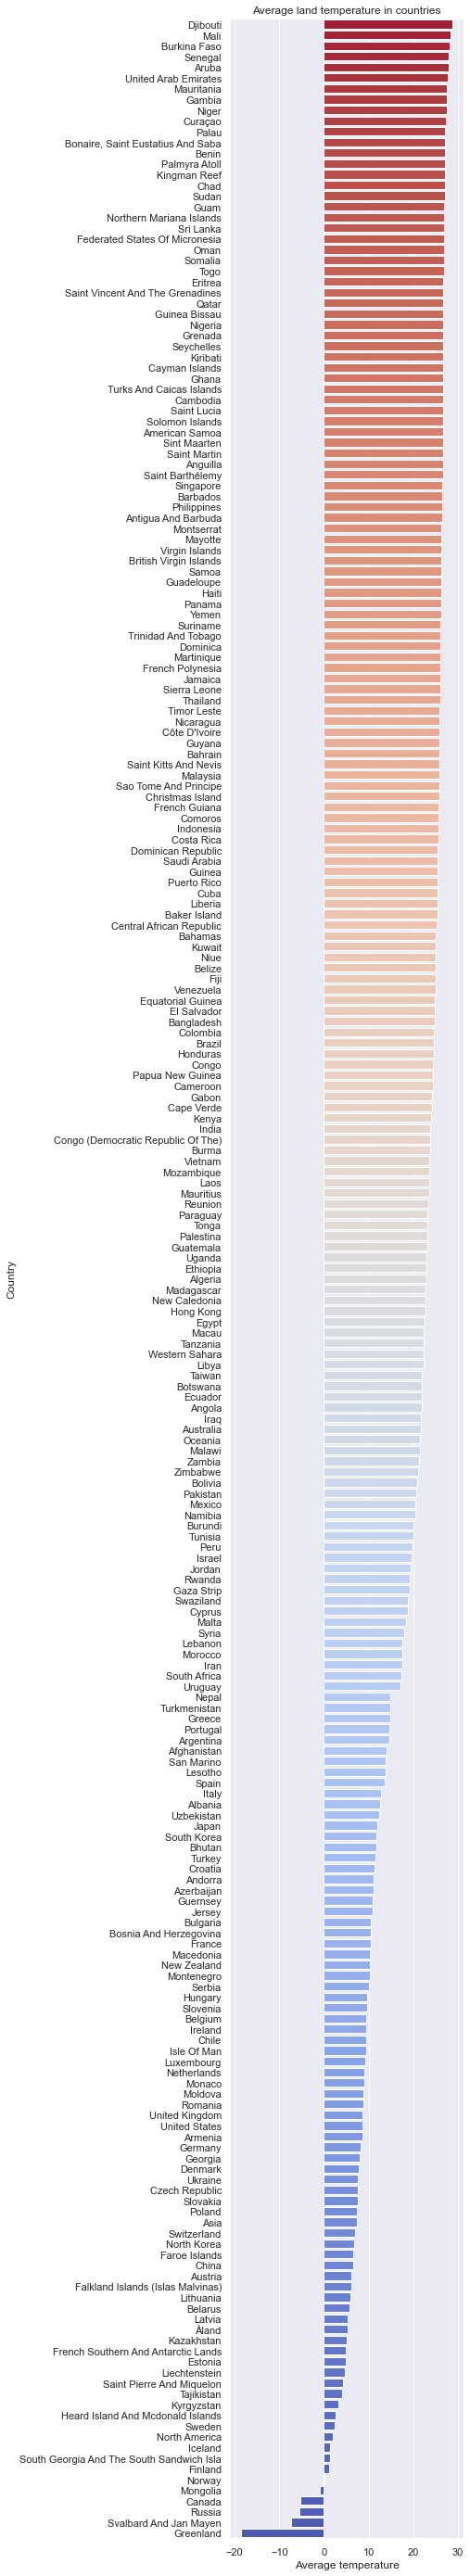

In [36]:
# Sort the countries by average temperature
temp = country_data_group.sort_values(by = "AverageTemperature", ascending = False)

# Plot 
fig, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(country_data_group.Country.values.tolist()))
sns.barplot(x = "AverageTemperature", y = "Country", data = temp, palette = colors_cw[::-1])
ax.set(xlabel='Average temperature', title='Average land temperature in countries')

**Note:** We can clear see that Greenland is the coolest and Djibouti is the hottest country on the planet with average temperature of **-18.587458ºC** and **28.816603ºC**

#### Countries with the highest temperature differences

Now let's look at the top 15 countries with highest temperature differences. Temperature difference is the difference between the maximum and minimum temperature value.

In [37]:
# Creating a temperory dataframe
temp_by_country = country_data.copy()

# list to store min and max temperature of various countries
max_min_list = []

# getting max and min temps
for country in countries_list:
    curr_temps = temp_by_country[temp_by_country['Country'] == country]['AverageTemperature']
    max_min_list.append((curr_temps.max(), curr_temps.min()))
    

In [38]:
# nan cleaning
res_max_min_list = []
res_countries = []

for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        res_max_min_list.append(max_min_list[i])
        res_countries.append(countries_list[i])

In [39]:
# calc differences        
differences = []

for tpl in res_max_min_list:
    differences.append(tpl[0] - tpl[1])
    
# sorting
differences, res_countries = (list(x) for x in zip(*sorted(zip(differences, res_countries), key=lambda pair: pair[0], reverse=True)))


[Text(0, 0.5, 'Countries'),
 Text(0.5, 0, 'Temperature difference'),
 Text(0.5, 1.0, 'Countries with the highest temperature differences')]

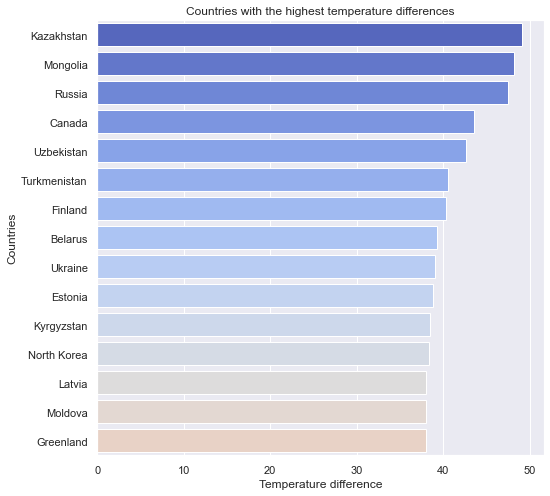

In [40]:
# ploting
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:15], y = res_countries[:15], palette = sns.color_palette("coolwarm", 25), ax = ax)
ax.set(ylabel="Countries", xlabel="Temperature difference", title="Countries with the highest temperature differences")

In [173]:
temp = country_data_new[country_data_new.Country == "Kazakhstan"]
print(f"Minimum Temperature recorded \033[4m\033[1m{temp.AverageTemperature.min()}\033[0m\033[0m")
print(f"Maximum Temperature recorded \033[4m\033[1m{temp.AverageTemperature.max()}\033[0m\033[0m")

Minimum Temperature recorded -23.601
Maximum Temperature recorded 25.562


**Note:** As we can see that **Kazakhstan** has the highest temperature difference between lowest and highest temperature recorded. With Minimum Temperature of **-23.601ºC** degree celcius and **25.562ºC** degree celcius.

<a id='city'></a>
### 5.3. Global Land Temperature by Major City

[...goto toc](#toc)



#### List of the ten hottest cities in 1980

In [42]:
city_data_new[city_data_new.year.map(lambda x: x == 1980)].groupby('City')[['AverageTemperature']].mean().sort_values(by = "AverageTemperature", ascending = False).head(10)

,AverageTemperature
City,
Umm Durman,29.686250
Madras,29.110833
Jiddah,28.322417
Bangkok,28.090000
Hyderabad,27.695917
Mogadishu,27.559667
Ho Chi Minh City,27.538500
Rangoon,27.450833
Fortaleza,27.322500


#### List of the ten hottest cities in 2010

In [43]:
city_data_new[city_data_new.year.map(lambda x: x == 2010)].groupby('City')[['AverageTemperature']].mean().sort_values(by = "AverageTemperature", ascending = False).head(10)

,AverageTemperature
City,
Umm Durman,30.730167
Jiddah,29.422083
Madras,29.047333
Bangkok,28.536917
Ho Chi Minh City,28.281750
Rangoon,28.216417
Fortaleza,28.179167
Mogadishu,28.025583
Ahmadabad,28.017833


As we can see, in those forty years there are some differences from 1980 to 2010:

1. Madras and Jiddah switched places.
2. Mogadishu moved down two ranks, from 6th place to 8th.
3. Ho Chi Minh City moved up 2 ranks, from 7th place to 5th.
4. Rangoon moved up 2 ranks, from 8th place to 6th.
5. Fortaleza moved up 2 ranks from 9th place to 7th.
6. Cities Surabaya and Hyderabad are no longer in the top ten, replaced by Ahmadabad and Lagos.

<a id='india'></a>
## 6. Climate Change in India

[...goto toc](#toc)



In [44]:
# Create dataframe containg only data of india
india_data = city_data_new[city_data_new.Country == "India"].reset_index(drop = True)
india_data.head()

,dt,Country,City,AverageTemperature,AverageTemperatureUncertainty,month,year
0,1796-01-01,India,Ahmadabad,19.649,2.286,1,1796
1,1796-02-01,India,Ahmadabad,21.632,1.770,2,1796
2,1796-03-01,India,Ahmadabad,24.953,2.427,3,1796
3,1796-04-01,India,Ahmadabad,30.297,1.827,4,1796
4,1796-05-01,India,Ahmadabad,33.223,1.496,5,1796


**In India the meteorological department follows the international standard of four seasons with some local adjustments:** 
- Winter (January and February)
- Summer (March, April and May)
- Monsoon (rainy) from (June to September)
- Post-Monsoon period (October to December)


In [45]:
# function to get seasons of india
def get_season_india(month):
    if month >= 3 and month <= 5:
        return 'summer'
    elif month >= 6 and month <= 9:
        return 'rainy'
    elif month >= 10 and month <= 12:
        return 'post-monsoon'
    else:
        return 'winter'
    
# Get seasons
india_data['season'] = india_data['month'].apply(get_season_india)
india_data.head()

,dt,Country,City,AverageTemperature,AverageTemperatureUncertainty,month,year,season
0,1796-01-01,India,Ahmadabad,19.649,2.286,1,1796,winter
1,1796-02-01,India,Ahmadabad,21.632,1.770,2,1796,winter
2,1796-03-01,India,Ahmadabad,24.953,2.427,3,1796,summer
3,1796-04-01,India,Ahmadabad,30.297,1.827,4,1796,summer
4,1796-05-01,India,Ahmadabad,33.223,1.496,5,1796,summer


In [47]:
# Get average temperature of india over decades
temp = india_data.groupby('year')[['AverageTemperature']].mean().reset_index()

# Get average temperature of india over decades during summers
summers = india_data[india_data.season == "summer"].groupby('year')[['AverageTemperature']].mean().reset_index()

# Get average temperature of india over decades during rainy
rainy = india_data[india_data.season == "rainy"].groupby('year')[['AverageTemperature']].mean().reset_index()

# Get average temperature of india over decades during winters
winters = india_data[india_data.season == "winter"].groupby('year')[['AverageTemperature']].mean().reset_index()

# Get average temperature of india over decades during post-monsoon
post_monsoon = india_data[india_data.season == "post-monsoon"].groupby('year')[['AverageTemperature']].mean().reset_index()

[Text(0.5, 1.0, 'Temperature of India from 1743 to 2013 years')]

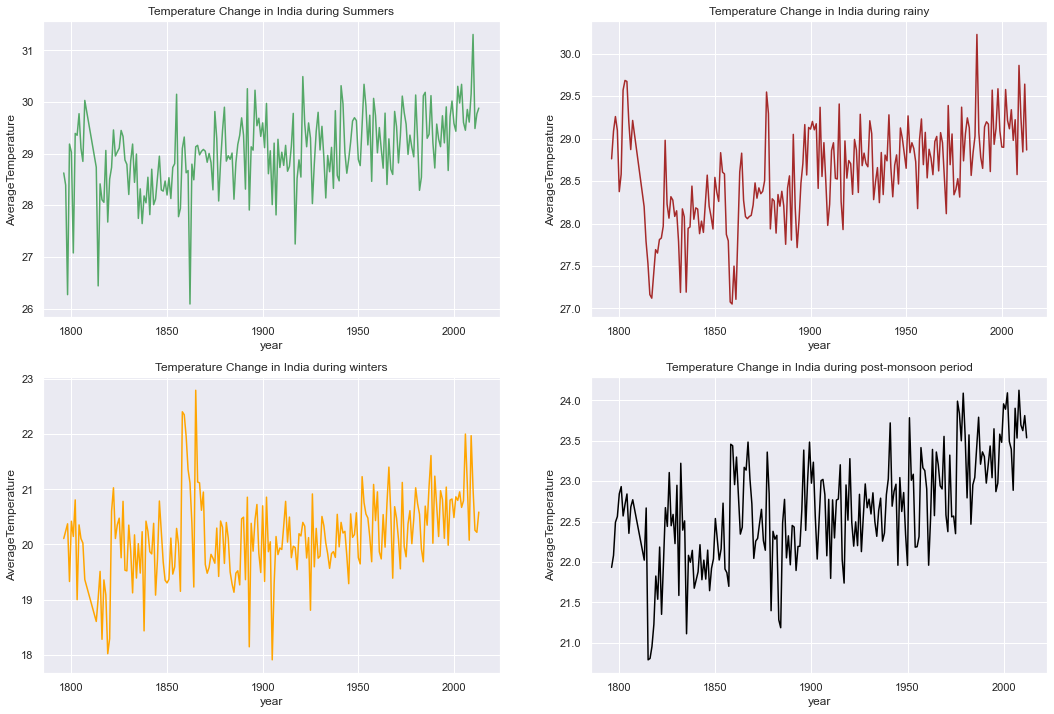

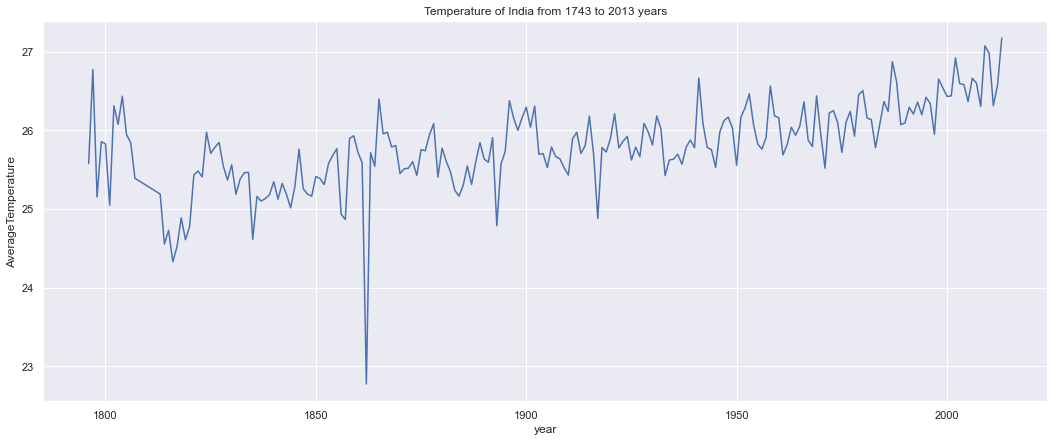

In [48]:
# Visualize temperature change in india
fig, ax = plt.subplots(2,2, figsize = (18,12))

sns.lineplot(x = "year", y = "AverageTemperature", data = summers, ax = ax[0,0], color="g")
ax[0,0].set(title = "Temperature Change in India during Summers")

sns.lineplot(x = "year", y = "AverageTemperature", data = rainy, ax = ax[0,1],  color="brown")
ax[0,1].set(title = "Temperature Change in India during rainy")

sns.lineplot(x = "year", y = "AverageTemperature", data = winters, ax = ax[1,0], color="orange")
ax[1,0].set(title = "Temperature Change in India during winters")

sns.lineplot(x = "year", y = "AverageTemperature", data = post_monsoon, ax = ax[1,1],  color="black")
ax[1,1].set(title = "Temperature Change in India during post-monsoon period")

fig, ax = plt.subplots(1, figsize = (18,7))
sns.lineplot(x = "year", y = "AverageTemperature", data = temp, ax = ax)
ax.set(title = "Temperature of India from 1743 to 2013 years")

**Note:**

- We can see that there is huge variation of temperature in india over the decades
- From 1950 the temperature of india keeps on increasing indicated a positive sign of global warming
- In every season we can see the upward trend indicating change in temperature

### Analyzing Major Indian Cities

In [49]:
# Get all indian cities
city_list = india_data["City"].unique().tolist()
city_list

['Ahmadabad',
 'Bangalore',
 'Bombay',
 'Calcutta',
 'Delhi',
 'Hyderabad',
 'Jaipur',
 'Kanpur',
 'Lakhnau',
 'Madras',
 'Nagpur',
 'New Delhi',
 'Pune',
 'Surat']

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Ahmadabad
------------------------------------------------------------------------------------------------------------------------------------------------------


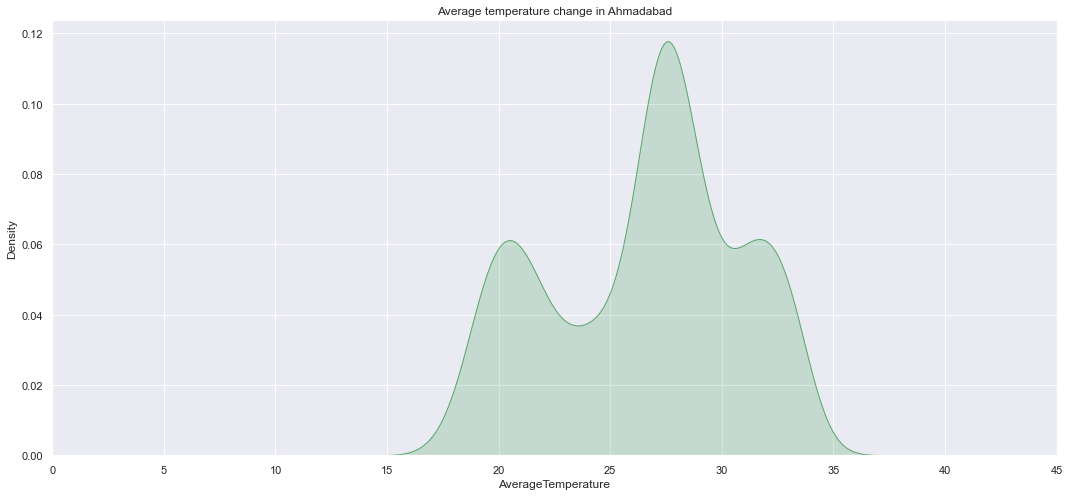

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Bangalore
------------------------------------------------------------------------------------------------------------------------------------------------------


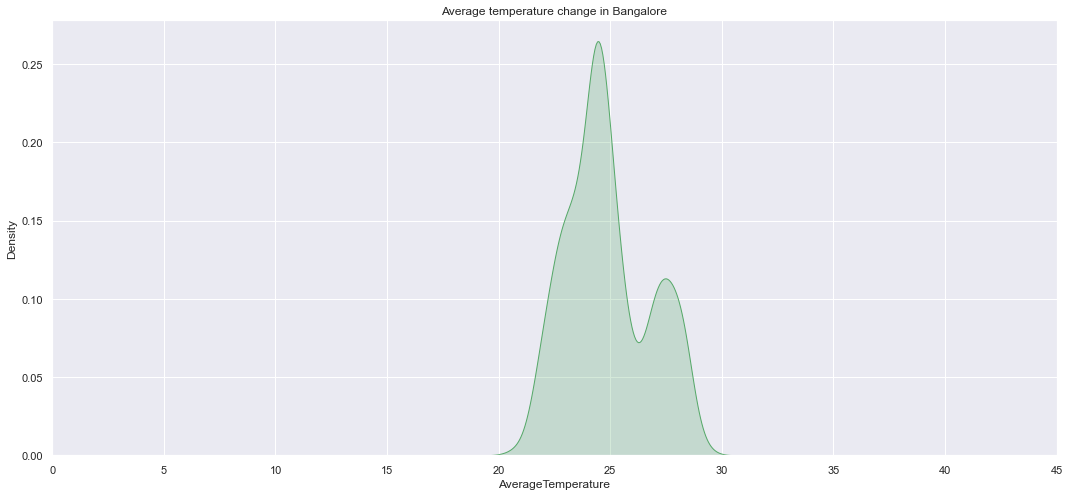

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Bombay
------------------------------------------------------------------------------------------------------------------------------------------------------


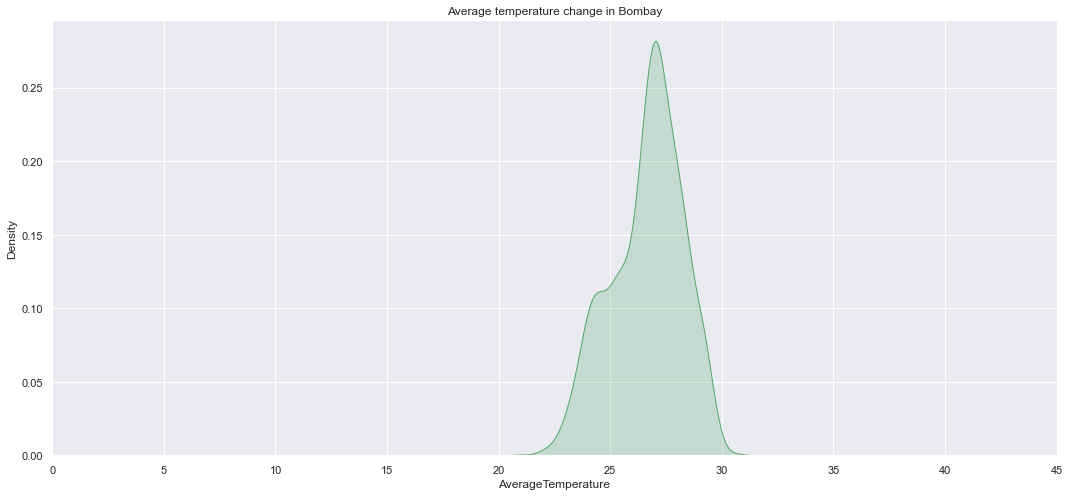

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Calcutta
------------------------------------------------------------------------------------------------------------------------------------------------------


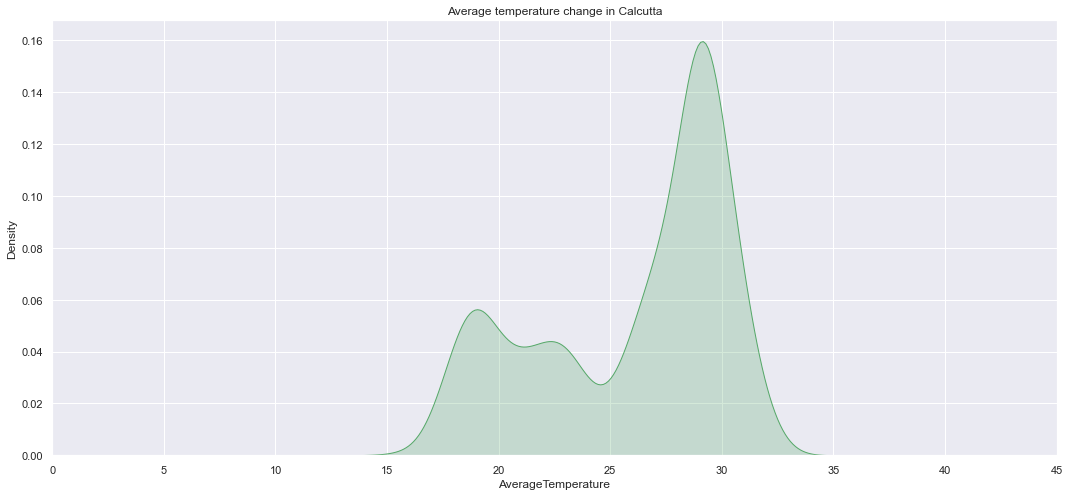

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Delhi
------------------------------------------------------------------------------------------------------------------------------------------------------


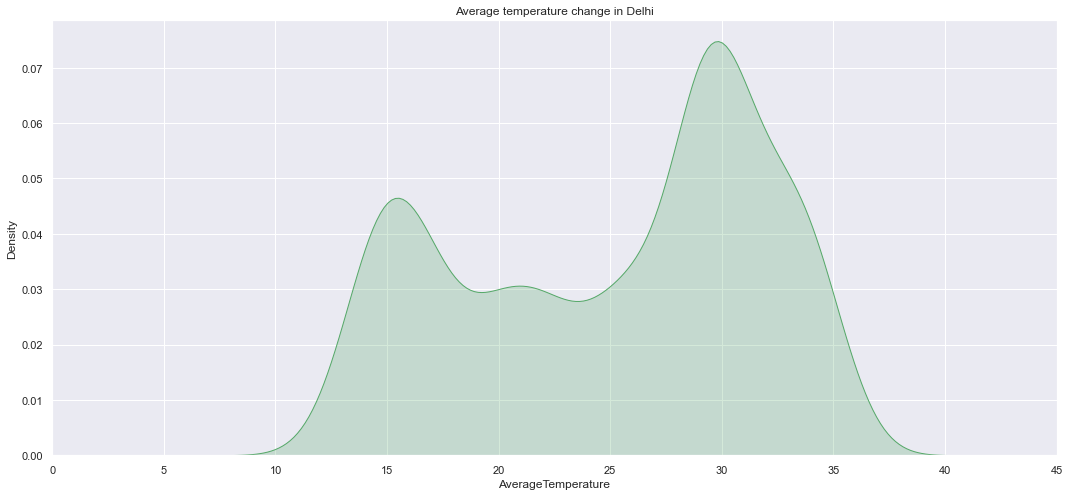

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Hyderabad
------------------------------------------------------------------------------------------------------------------------------------------------------


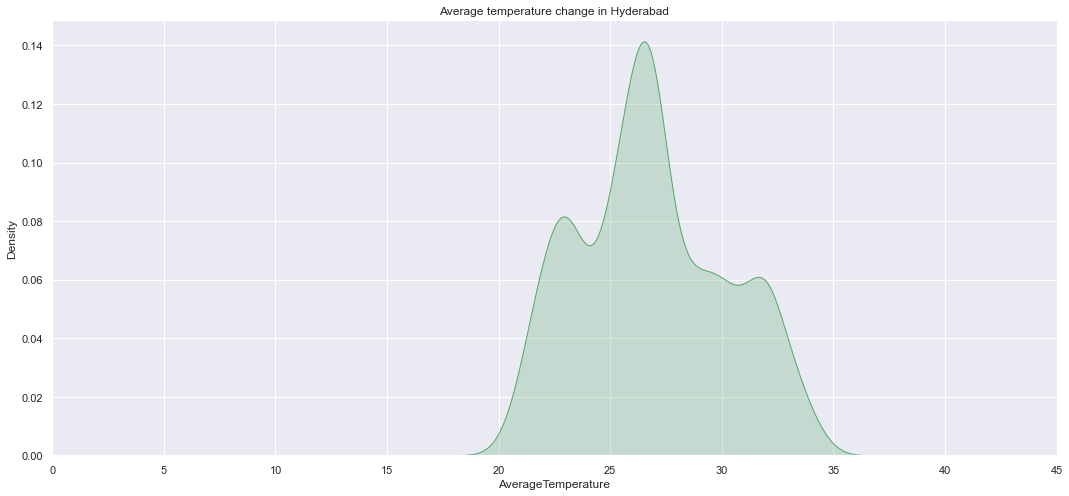

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Jaipur
------------------------------------------------------------------------------------------------------------------------------------------------------


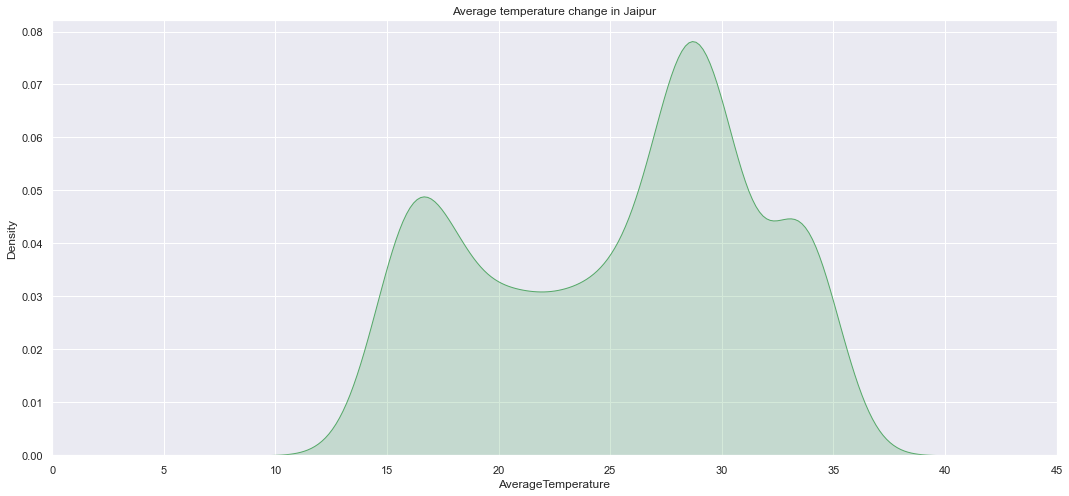

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Kanpur
------------------------------------------------------------------------------------------------------------------------------------------------------


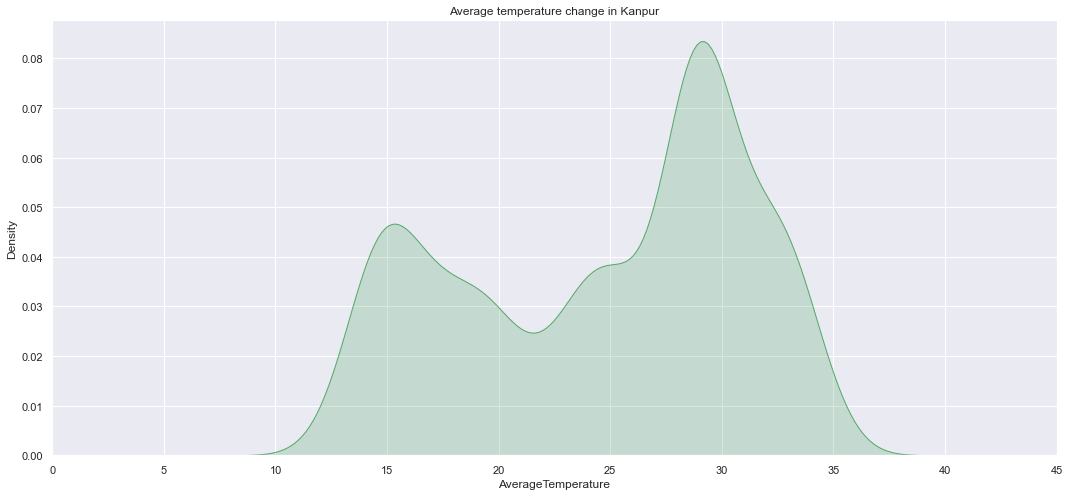

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Lakhnau
------------------------------------------------------------------------------------------------------------------------------------------------------


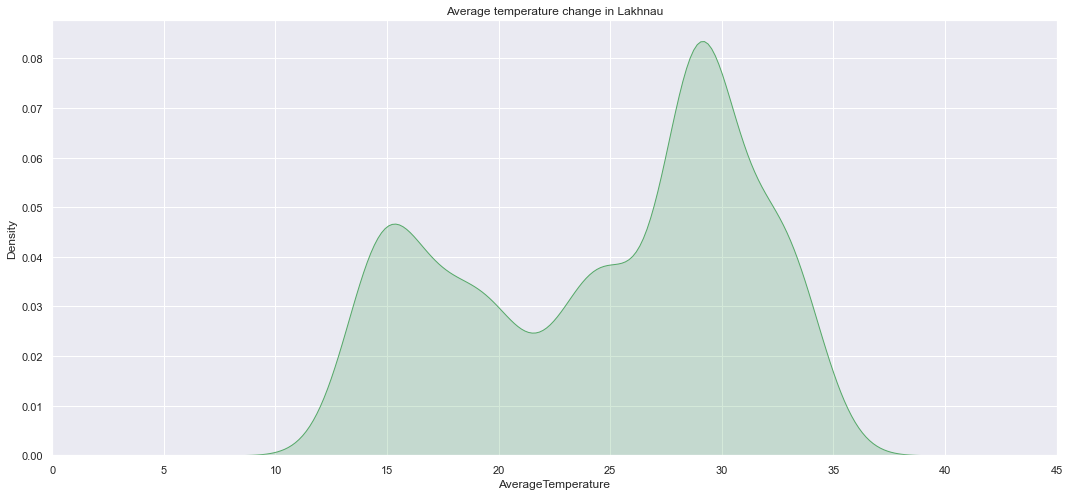

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Madras
------------------------------------------------------------------------------------------------------------------------------------------------------


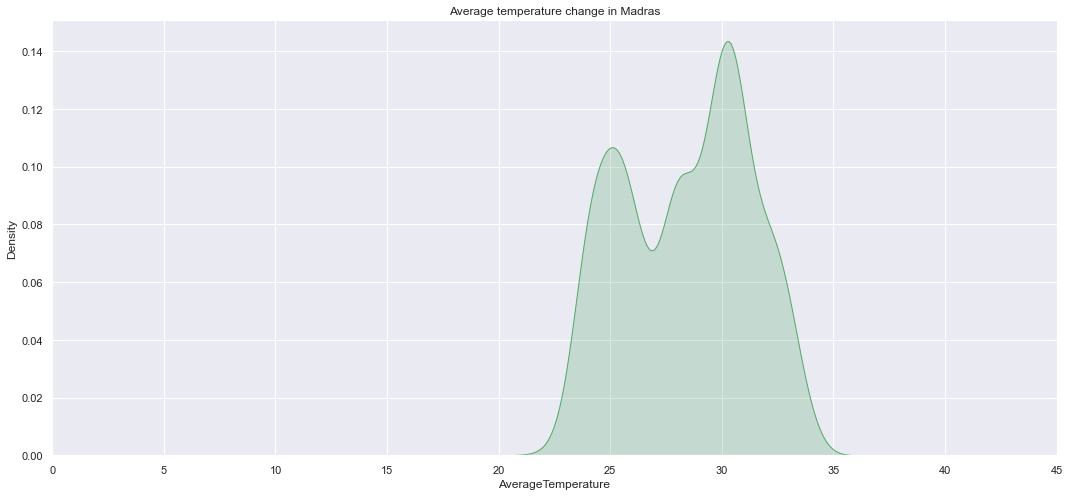

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Nagpur
------------------------------------------------------------------------------------------------------------------------------------------------------


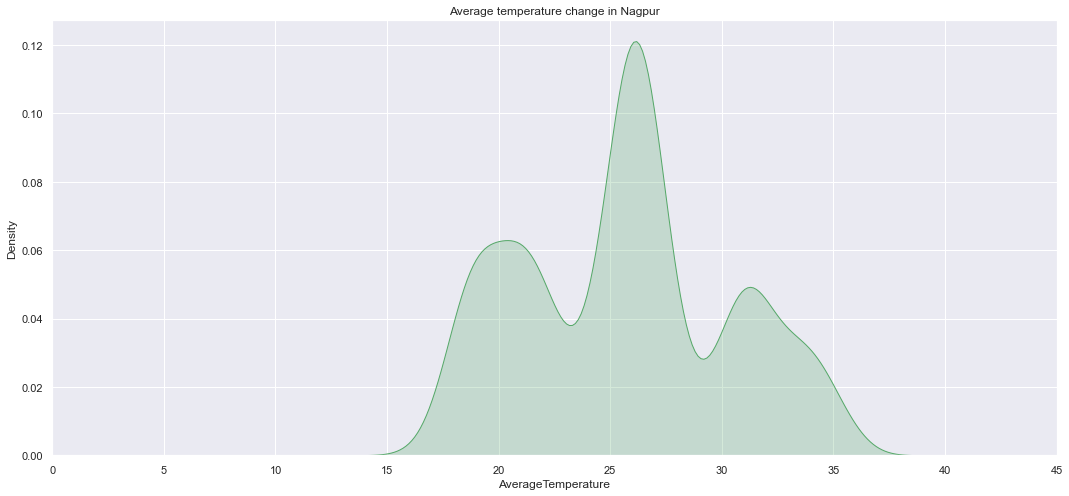

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in New Delhi
------------------------------------------------------------------------------------------------------------------------------------------------------


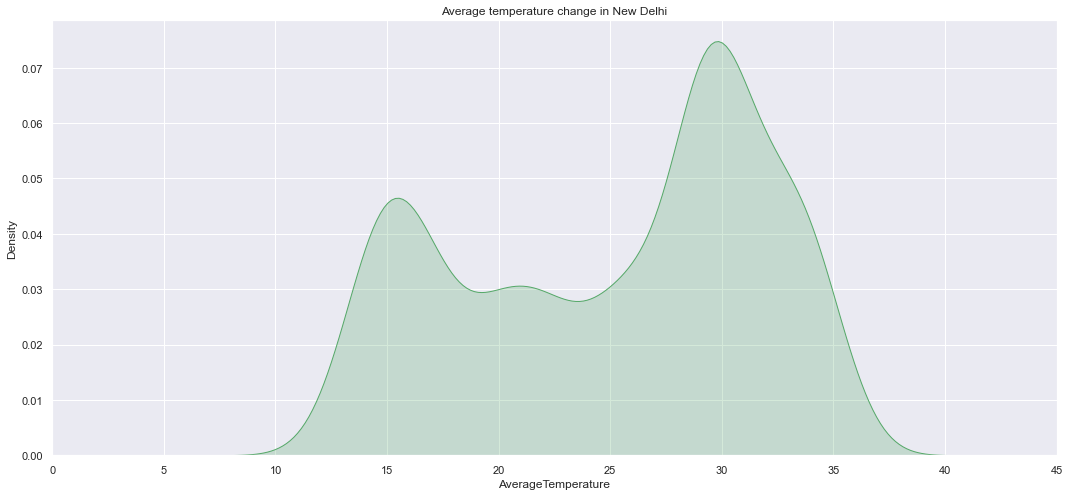

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Pune
------------------------------------------------------------------------------------------------------------------------------------------------------


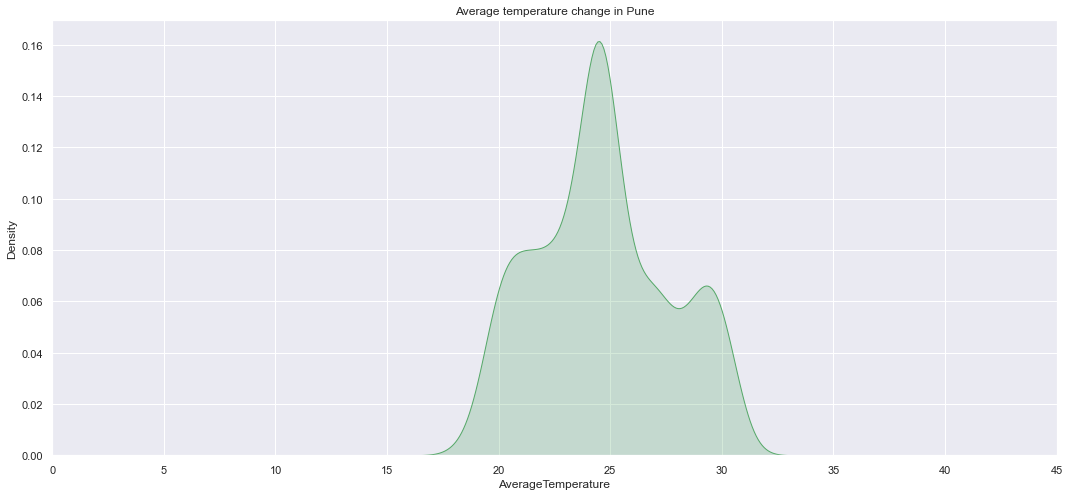

------------------------------------------------------------------------------------------------------------------------------------------------------
Temperature variation in Surat
------------------------------------------------------------------------------------------------------------------------------------------------------


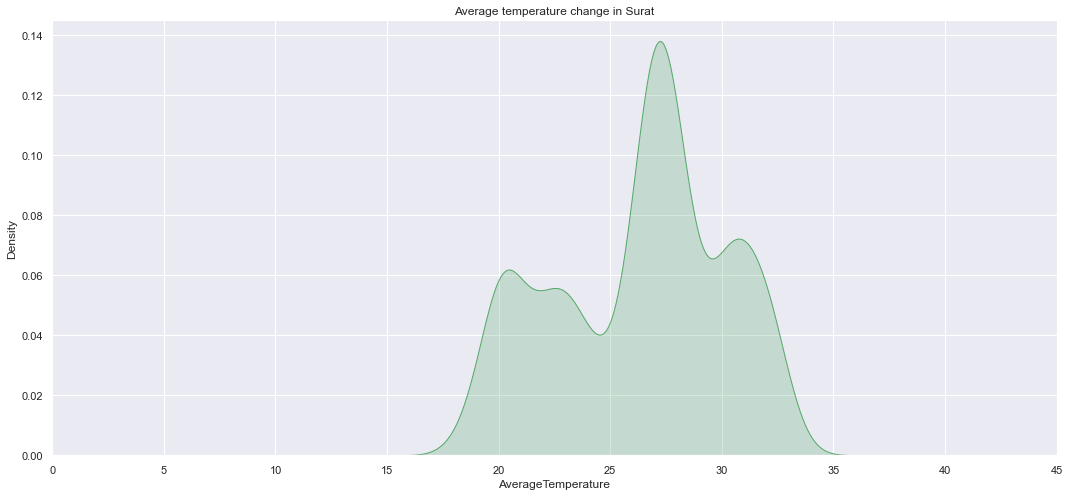

In [50]:
for city in city_list:
    print("-"*150)
    print(f"Temperature variation in \033[4m\033[1m{city}\033[0m\033[0m")
    print("-"*150)
    fig, axes = plt.subplots(figsize = (18, 8))
    sns.kdeplot(data = india_data[india_data.City == city], x = "AverageTemperature", ax = axes, shade=True, color = "g")
    axes.set(title = f"Average temperature change in {city}", xlim = (0, 45))
    
    plt.show()

We can see that in general there is drastic change in temperature for the decades in major cities of india

#### Indian cities with the highest temperature differences

In [51]:
#city_list = []
min_max_list = []

# getting max and min temps
for city in city_list:
    curr_temps = india_data[india_data['City'] == city]['AverageTemperature']
    curr_temps_uncertain = india_data[india_data['City'] == city]['AverageTemperatureUncertainty']
    min_max_list.append((curr_temps.max(), curr_temps.min()))
    

In [52]:
# nan cleaning
res_min_max_list = []
res_cities = []

for i in range(len(min_max_list)):
    if not np.isnan(min_max_list[i][0]):
        res_min_max_list.append(min_max_list[i])
        res_cities.append(city_list[i])

In [53]:
# calc differences        
differences = []

for tpl in res_min_max_list:
    differences.append(tpl[0] - tpl[1])
    
# sorting
differences, res_cities = (list(x) for x in zip(*sorted(zip(differences, res_cities), key=lambda pair: pair[0], reverse=True)))

In [54]:
temp_list = [i[0] for i in res_min_max_list]
temp_list.extend([i[1] for i in res_min_max_list])

min_max_temp = ['City Maximum' for i in res_min_max_list]
min_max_temp.extend(['City Minimum' for i in res_min_max_list])

city_list_temp = [i for i in res_cities]
city_list_temp.extend([i for i in res_cities])

min_max_df = pd.DataFrame()
min_max_df['Cities'] = city_list_temp
min_max_df['Average Temperature'] = temp_list
min_max_df['type'] = min_max_temp

[Text(0.5, 1.0, 'Indian Cities with the minimum and maximum temperature')]

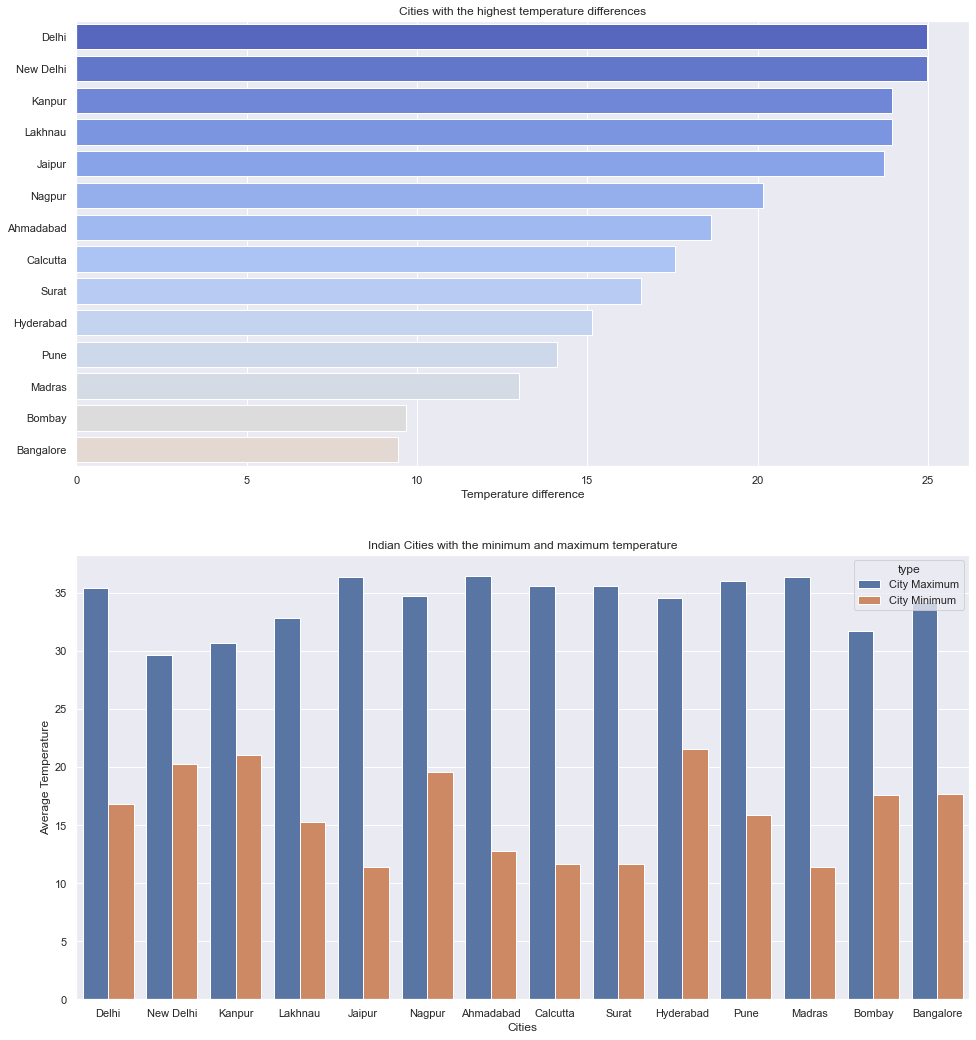

In [55]:
# ploting cities with temperature difference
f, ax = plt.subplots(2, 1, figsize=(16, 18))
sns.barplot(x = differences[:15], y = res_cities[:14], palette=sns.color_palette("coolwarm", 25), ax = ax[0])

ax[0].set(ylabel="", xlabel="Temperature difference", title="Cities with the highest temperature differences")

sns.barplot(x = "Cities", y="Average Temperature", hue="type", data=min_max_df)
ax[1].set(title="Indian Cities with the minimum and maximum temperature")

<a id='tsm'></a>
## 7. Time Series Modeling

[...goto toc](#toc)


There are several things that are time dependent, I mean, today's values can have an effective relationship to values that have occurred in the past.

Some examples related to the subject are demand of products during a certain period, harvest of commodities, stock prices and of course what we will try to predict, the climate change of **Bombay**.

Currently there are several types of time series forecast models, in this notebook we will trying to use **ARIMA** and **Seasonal ARIMA** models.

#### Get the data ready


In [56]:
# For forcasting we need only date and temperature
time_series = india_data[india_data.City == "Bombay"][['dt', 'AverageTemperature']]

# Rename the columns
time_series.columns = ['Date','Temp']

# We will set date as index
time_series.set_index('Date', inplace = True)

In [57]:
# We will be considering the temperature just from 1900 until the end of 2012
time_series = time_series.loc['1900-01-01':'2013-01-01']

In [58]:
# Convert TimeSeries to specified frequency in our case to months
time_series = time_series.asfreq('M', method='bfill')
time_series.head()

,Temp
Date,
1900-01-31,24.235
1900-02-28,25.973
1900-03-31,27.596
1900-04-30,29.045
1900-05-31,29.203


In [59]:
time_series['month'] = time_series.index.month
time_series['year'] = time_series.index.year
time_series.head()

,Temp,month,year
Date,,,
1900-01-31,24.235,1,1900
1900-02-28,25.973,2,1900
1900-03-31,27.596,3,1900
1900-04-30,29.045,4,1900
1900-05-31,29.203,5,1900


<a id='visualize'></a>
### 7.1. Visualize the Time Series

[...goto toc](#toc)

let's plot the series and check its behavior

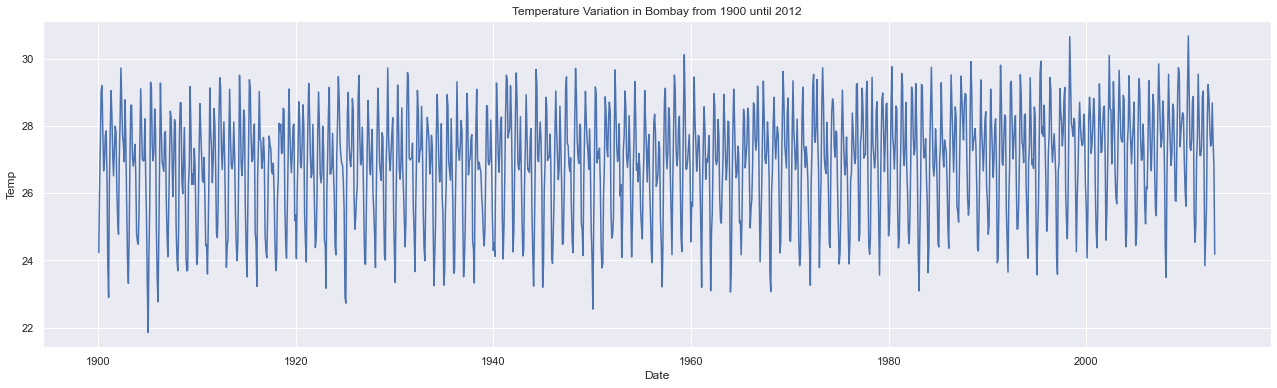

In [60]:
plt.figure(figsize=(22,6))
sns.lineplot(x = time_series.index, y = time_series['Temp'])
plt.title('Temperature Variation in Bombay from 1900 until 2012')
plt.show()

### Check for seasonality

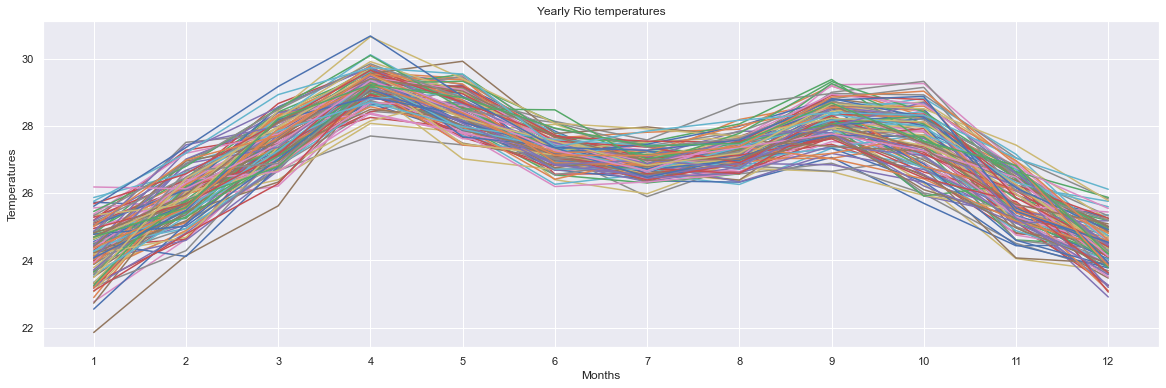

In [61]:
# Create a pivot table
pivot = pd.pivot_table(time_series, values='Temp', index='month', columns='year', aggfunc='mean')

# Plot pivot
pivot.plot(figsize=(20,6))
plt.title('Yearly Rio temperatures')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

Series seems to have some seasonality. Just to make the things clear, let's merge these lines into just one line by averaging the monthly levels.

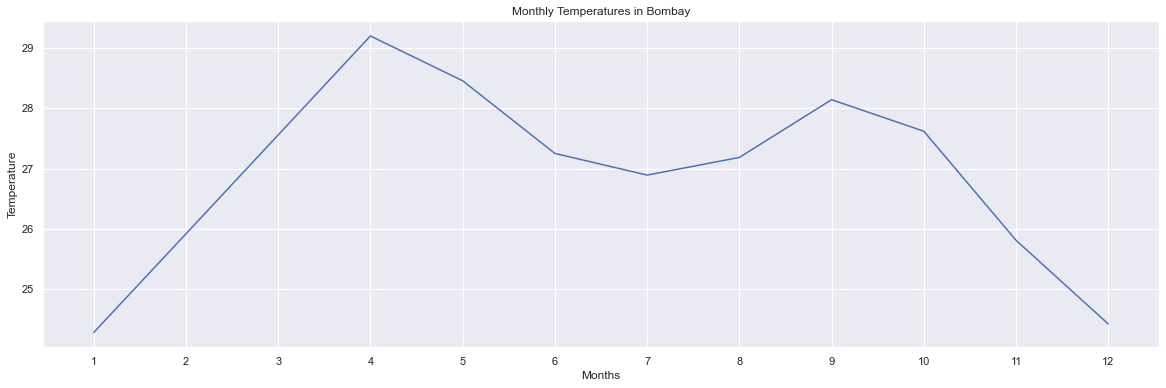

In [62]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures in Bombay')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

**Important Inferences**

The series clearly has some seasonality, 
- Higher temperatures are around March to June and from September to October 
- Lower are between June and September. 

### Check for Trend

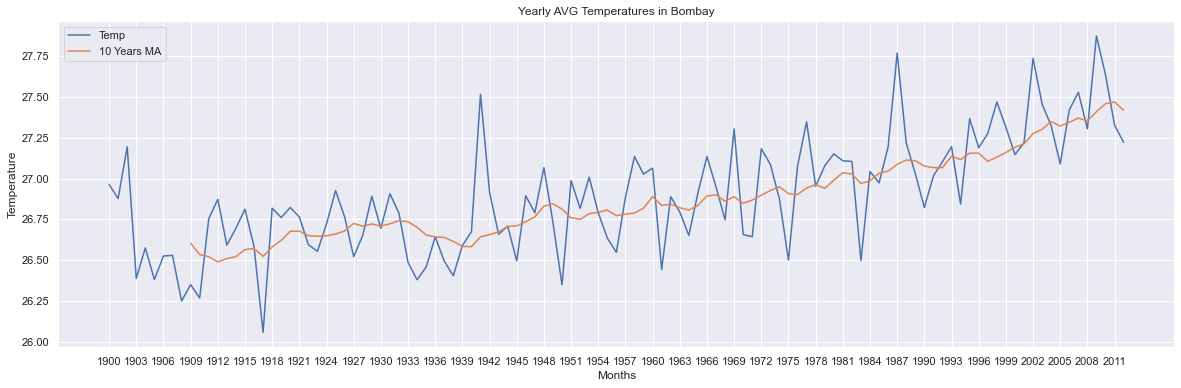

In [63]:
# Create the pivot table
year_avg = pd.pivot_table(time_series, values='Temp', index='year', aggfunc='mean')

# Add column of rolling mean
year_avg['10 Years MA'] = year_avg['Temp'].rolling(10).mean()

# Plot the graph
year_avg[['Temp','10 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Temperatures in Bombay')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()

**Important Inferences**

There is a constant increasing trend and the average temperature increased from 26.35º to 27.2º, that's 3.1% in over 111 years.

<a id='stationarize'></a>
### 7.2. Stationarize the Series

[...goto toc](#toc)

To create a time series forecast, the series must be stationary.

**Conditions for Stationarity:**

1. Time series should have a constant mean.
2. Time series should have a constant standard deviation.
3. Time series’s auto-covariance should not depend on time.

**Check for Stationarity**

One way to check if the series is stationary is perform the **Adfuller test**.In adfuller test we use **ACF** and **PACF**.

- *Auto Correlation Function (ACF)*: It shows the correlation between the current temperatures versus the lagged versions of itself.

- *Partial autocorrelation (PACF)*: It shows the correlation between the current temperatures versus the lagged version excluding the effects of earlier lags.

**After performing Adfuller test if p-value is**

- Lower than 5% (usual number used for this kind of study) the series is stationary and we can start modelling.
- Greater than 5% then the series isn't stationary and we need do some data transformation like using natural logarithm, deflation, differencing, etc.

**Let's create a function which check the stationarity and plots:**

- The series itself;
- The autocorrelation function (ACF): It shows the correlation between the current temperatures versus the lagged versions of itself.
- The partial autocorrelation (PACF): It shows the correlation between the current temperatures versus the lagged version excluding the effects of earlier lags, for example, it show the effective influence of the lag 3 in the current temperatures excluding the effects of the lags 1 and 2.

In [64]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    
    # Convert to pandas series
    y = pd.Series(y)
    
    # Creating plots of the DF
    fig = plt.figure()
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    # Plot the temperature
    y.plot(ax=ax1, figsize=figsize)
    # Set title
    ax1.set_title('Bombay Temperature Variation')
    
    # Plot Auto Correlation using plot_acf of statsmodels
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    
    # Plot Partial Auto Correlation using plot_pacf of statsmodels
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    
    # Plot temperature as distibution
    sns.distplot(y, bins=int(math.sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    
    print('Results of Dickey-Fuller Test:')
    
    # Perform the Adfuller test
    adfinput = adfuller(y)
    
    # Create a series object
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    
    # Round them to four decimals
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest[f"Critical Value ({key})"] = value.round(4)
        
    print(adftest)
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%. The series seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%. The series isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                   -3.7015
p-value                           0.0041
Lags Used                        23.0000
Number of Observations Used    1332.0000
Critical Value (1%)              -3.4353
Critical Value (5%)              -2.8637
Critical Value (10%)             -2.5679
dtype: float64

The Test Statistics is lower than the Critical Value of 5%. The series seems to be stationary


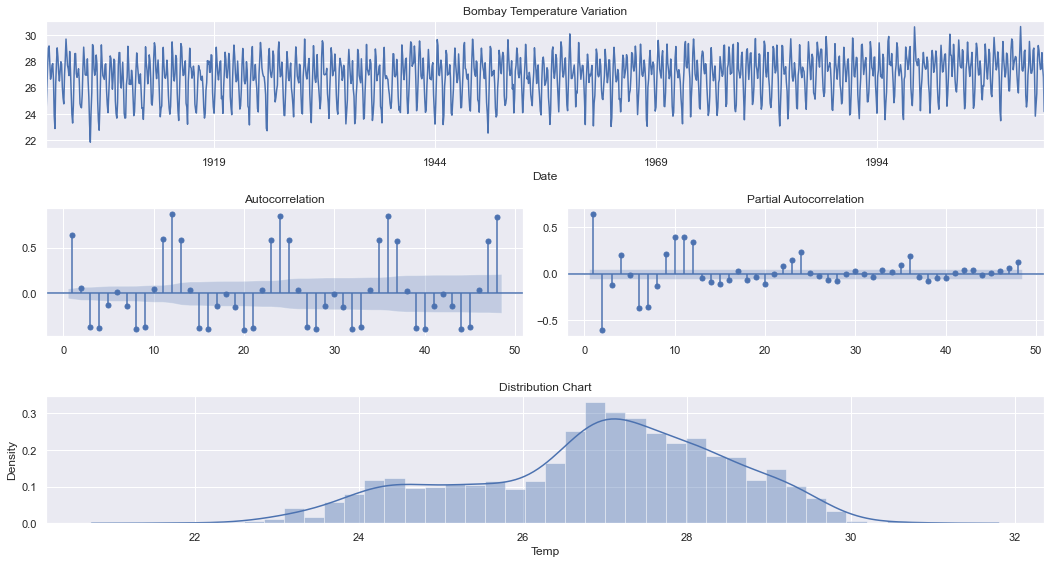

In [65]:
# Check stationarity
check_stationarity(time_series.Temp)

**Important Inferences**

The series has an interesting behavior, there is a sequential significative negative autocorrelation starting at lag 8 and repeating each 12 months, it's because of the difference in the seasons, if today is winter with cold temperatures in 6 months we will have higher temperatures in the summer, that's why the negative autocorrelation occurs. These temperatures usually walk in opposite directions.

Also, from lag 12 and sequentially from every 12 lags there is a significant positive autocorrelation. The PACF shows a positive spike in the first lag and a drop to negative PACF in the following lags.

Results of Dickey-Fuller Test:
Test Statistic                  -13.3642
p-value                           0.0000
Lags Used                        23.0000
Number of Observations Used    1320.0000
Critical Value (1%)              -3.4353
Critical Value (5%)              -2.8637
Critical Value (10%)             -2.5679
dtype: float64

The Test Statistics is lower than the Critical Value of 5%. The series seems to be stationary


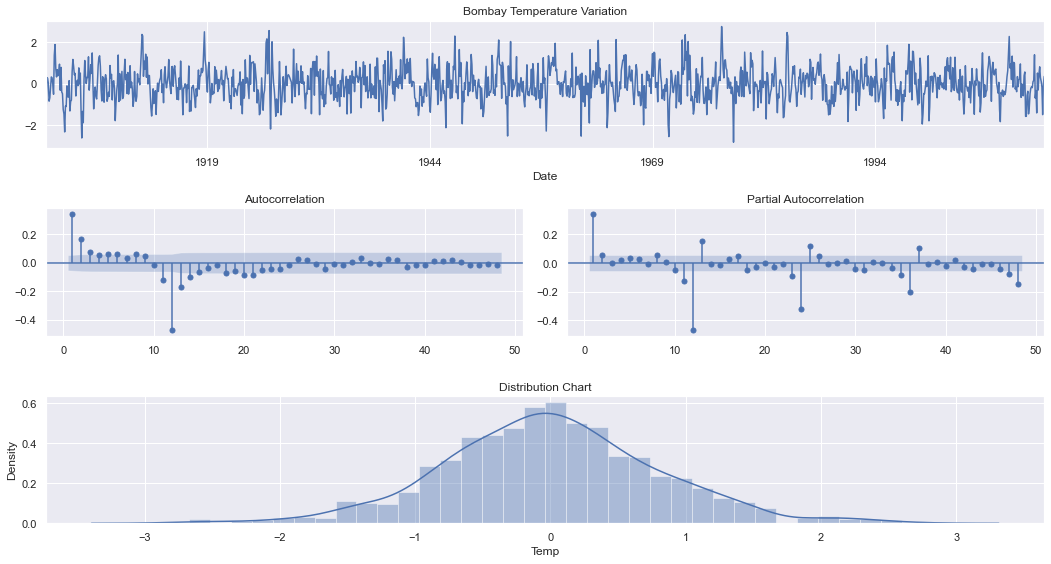

In [66]:
check_stationarity(time_series['Temp'].diff(12).dropna())

**Important Inferences**

- As the plots above showed, the first ACF lags have a gradual decay, while the PACF drops under the confidence interval after the second lag, this is an AR signature with a parameter of 2, so this is an AR(2) model.

- As we used a first seasonal difference, the ACF and PACF showed a significative drop in the 12th lag, it means an SMA signature with a parameter of 1 lag, resuming this is an SAR(1) with a first difference.

Initially i'm going to work with the following (p,d,q) orders: **(3, 0, 0)**, and with the following seasonal (P, D, Q, S) orders **(0,1,1,12)** and as the series has a clear uptrend i'm going to use it in the model.

<a id='optimal'></a>
### 7.3. Find Optimal Parameters

[...goto toc](#toc)

We will use **grid search** to find the optimal set of parameters that yields the best performance for our model

In [174]:
# Tuple of parameters
paras = ((2,0,0),(0,1,1,12),'c')

In [175]:
# Create combinations of parameter for grid search
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# Create list of possible combinations
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [176]:
# Get temperature 
y = time_series.Temp.copy(deep = True)

In [177]:
min_aic, best_param, best_seasonal_param = 10**10, [], []

# Iterate over the list and fit on Seasonal-ARIMA Model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Initialize the SARIMA model
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order=param_seasonal, enforce_stationarity = False, 
                                            enforce_invertibility = False)
            # Fit the model
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            # We are selecting those parameter which has minimum AIC score
            if results.aic < min_aic:
                min_aic, best_param, best_seasonal_param = results.aic, param, param_seasonal
                
            
            
        except:
            continue

print("-"*50)
print(f"Best AIC Score achieved \033[4m\033[1m{min_aic}\033[0m\033[0m")
print(f"Parameter - ARIMA\033[4m\033[1m{best_param}\033[0m\033[0mx\033[4m\033[1m{best_seasonal_param}\033[0m\033[0m12 ")

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12773.428527051572
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10887.805381482623
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3191.316866656093
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2369.9344208868006
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3197.337865189552
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2362.1158941847234
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2830.7150426042
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2371.1702274486192
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:10963.911275600334
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9192.513071227744
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3052.93150521593
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2199.896657067201
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3060.854940528914
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2195.5743211961426
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2677.6942120976832
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2201.78351671782
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4632.061891965519
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4008.1271751323334
ARIMA

**Important Inference**

We have got a best AIC score of 2132.43 with parameters (1,1,1) and seasonal parameters (0,1,1,12)

<a id='arima'></a>
### 7.4. Build SARIMA Model

[...goto toc](#toc)

In [178]:
time_series_model = sm.tsa.statespace.SARIMAX(y, order = best_param, seasonal_order = best_seasonal_param, enforce_stationarity=False,
                                enforce_invertibility=False)

# Fit the SARIMA Model
results = time_series_model.fit()

# Print summary table
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3729      0.026     14.566      0.000       0.323       0.423
ma.L1         -0.9938      0.005   -192.079      0.000      -1.004      -0.984
ma.S.L12      -1.0310      0.011    -96.371      0.000      -1.052      -1.010
sigma2         0.2659      0.011     24.081      0.000       0.244       0.288


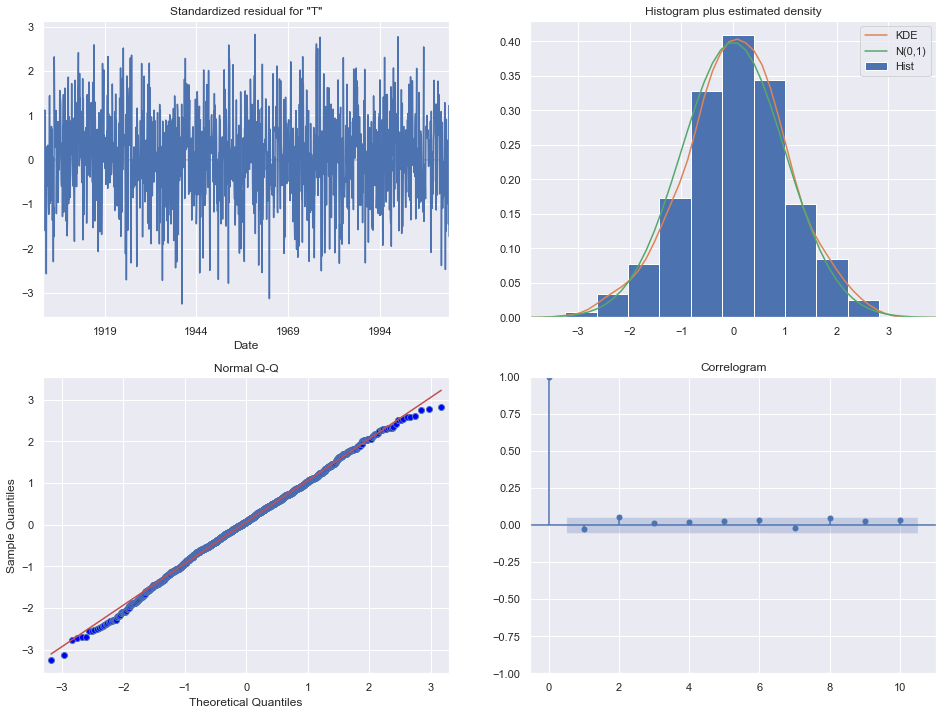

In [190]:
# Running model diagnostiscs to check any unusual behaviour
results.plot_diagnostics(figsize=(16, 12))
plt.savefig("inference.png")
plt.show()

The model diagnostics indicates that the model residuals are near normally distributed

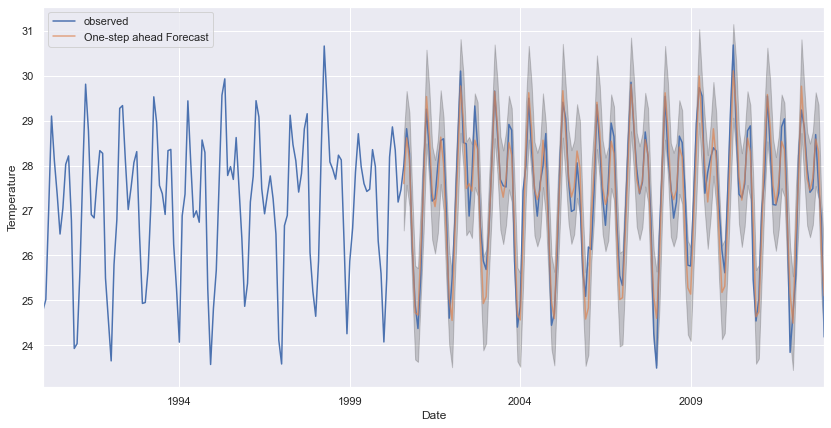

In [180]:
# set forecasts to start at 2012-08-31 to the end of the data to forecast
pred = results.get_prediction(start = pd.to_datetime('2000-08-31'), dynamic=False)
pred_ci = pred.conf_int()

# Plot the forecast
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

**The predicated values align well with the true values**. The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). 

### Calculating MSE and RMSE

In [183]:
# Get predicted values
y_forecasted = pred.predicted_mean.values

# Get actual values
y_truth = y['2000-08-31':].values 

# Calculate MSE and RMSE
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our model is \033[4m\033[1m{}\033[0m\033[0m'.format(round(mse, 2)))
print('The Root Mean Squared Error of our model is \033[4m\033[1m{}\033[0m\033[0m'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our model is 0.24
The Root Mean Squared Error of our model is 0.49


<a id='predict'></a>
### 7.5. Make Predictions

[...goto toc](#toc)

We will predict the temperature of Bombay for next 13 months i.e till **2014-01-31**

In [184]:
# Make forecasting
pred_uc = results.get_forecast(steps=13)
print(pred_uc.predicted_mean)

2013-01-31    24.625157
2013-02-28    26.372288
2013-03-31    28.052001
2013-04-30    29.683137
2013-05-31    28.887502
2013-06-30    27.729169
2013-07-31    27.366549
2013-08-31    27.699599
2013-09-30    28.668942
2013-10-31    28.279646
2013-11-30    26.479895
2013-12-31    24.947073
2014-01-31    24.914848
Freq: M, Name: predicted_mean, dtype: float64


In [185]:
pred_ci = pred_uc.conf_int()
pred_ci

,lower Temp,upper Temp
2013-01-31,23.583076,25.667238
2013-02-28,25.257824,27.486752
2013-03-31,26.926973,29.177029
2013-04-30,28.556300,30.809974
2013-05-31,27.760259,30.014746
2013-06-30,26.601786,28.856552
2013-07-31,26.239091,28.494008
2013-08-31,26.572084,28.827114
2013-09-30,27.541377,29.796508
2013-10-31,27.152033,29.407260


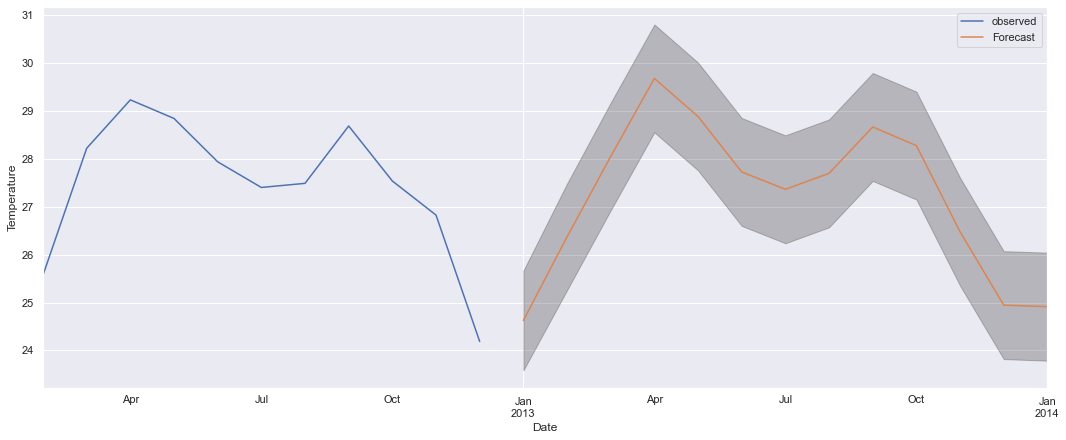

In [186]:
# Visualizing the Forecast

ax = y[y.index > '2012-01-31'].plot(label='observed', figsize=(18, 7))
pred_uc.predicted_mean.plot(ax = ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.savefig("Forecast.png")
plt.show()

### Save Forecasting

In [187]:
# Create a dataframe to save forecast
forecast = pd.DataFrame()
forecast["Date"] = pred_uc.predicted_mean.index
forecast["Temp"] = pred_uc.predicted_mean.values
forecast

,Date,Temp
0,2013-01-31,24.625157
1,2013-02-28,26.372288
2,2013-03-31,28.052001
3,2013-04-30,29.683137
4,2013-05-31,28.887502
5,2013-06-30,27.729169
6,2013-07-31,27.366549
7,2013-08-31,27.699599
8,2013-09-30,28.668942
9,2013-10-31,28.279646


In [188]:
# Save forecast
forecast.to_csv("forecast.csv", index=False)

### Save the SARIMA Model

In [189]:
# save model
results.save('model.pkl')

<a id='conclusion'></a>

[...goto toc](#toc)


<hr style="border:1.2px solid gray"> </hr>
<h3><center><u>Conclusion</u></center></h3>
<hr style="border:1.2px solid gray"> </hr>

During my research it was found that there has been a global increase trend in temperature, particularly over the last 30 years. This is due to the violent activities of a humankind. In more developed countries the temperature began to register much earlier. Over time the accuracy of the observations is increased, that is quite natural. Mankind must reflect and take all necessary remedies to reduce emissions of greenhouse gases in the atmosphere. 

Additionaly, I have build a **Seasonal-ARIMA** model to forecast temperature of Bomaby city. 

| Model | MSE | RMSE |
| :-: | :-: | :-: | 
| Seasonal-ARIMA	  | 0.24 | 0.49 |


The built model is than used to predict the temperature of bombay for year 2013. 

According to the forecasting Bombay will record a highest temperature of **28.55ºC** in the month of April i.e during summers. Additionaly, monsoon is going to be cooler and there will increase in temperature in post-monsoon period. The temperature in winter's will remain same i.e **25ºC**.